In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import json
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

RESULT_PATH = './results/'

def open_json(file_name):
    with open(file_name) as json_file:
        data = json.load(json_file)
    return data

#create graph for timing
def create_graph(data):
    timing_elements = data['timing'][0].keys()

    fig, ax = plt.subplots(figsize=(12,7))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    fig.suptitle('Timing and Peak Memory Boxplots of command:\n'+' '.join(data['command']), fontsize=14)
    
    ax1 = plt.subplot(gs[0])
    boxplot_data = [[d[element] for d in data['timing']] for element in timing_elements]
    boxplot = ax1.boxplot(boxplot_data)
    ax1.set_ylim(0, np.max(boxplot_data)*1.05)
    ax1.set_xticklabels(timing_elements)
    ax1.set_ylabel('Seconds')
    ax1.set_xlabel('Timing')

    for median in boxplot['medians']:
        x, y = median.get_xydata()[1] 
        ax1.text(x, y, f'{y:.3f}', ha='center', va='bottom', fontweight='bold')

    ax2 = plt.subplot(gs[1])
    boxplot = ax2.boxplot(data['peak_mem'])
    x, y = boxplot['medians'][0].get_xydata()[1]
    ax2.text(x, y, f'{y:.3f}', ha='center', va='bottom', fontweight='bold')
    #ax2.set_ylim(0, np.max(data['peak_mem'])*1.05)
    ax2.set_xlabel('KiloBytes')
    ax2.set_ylabel('Peak Memory')

    plt.tight_layout()
    plt.show()

#############################################
########## transpose ##########
#############################################


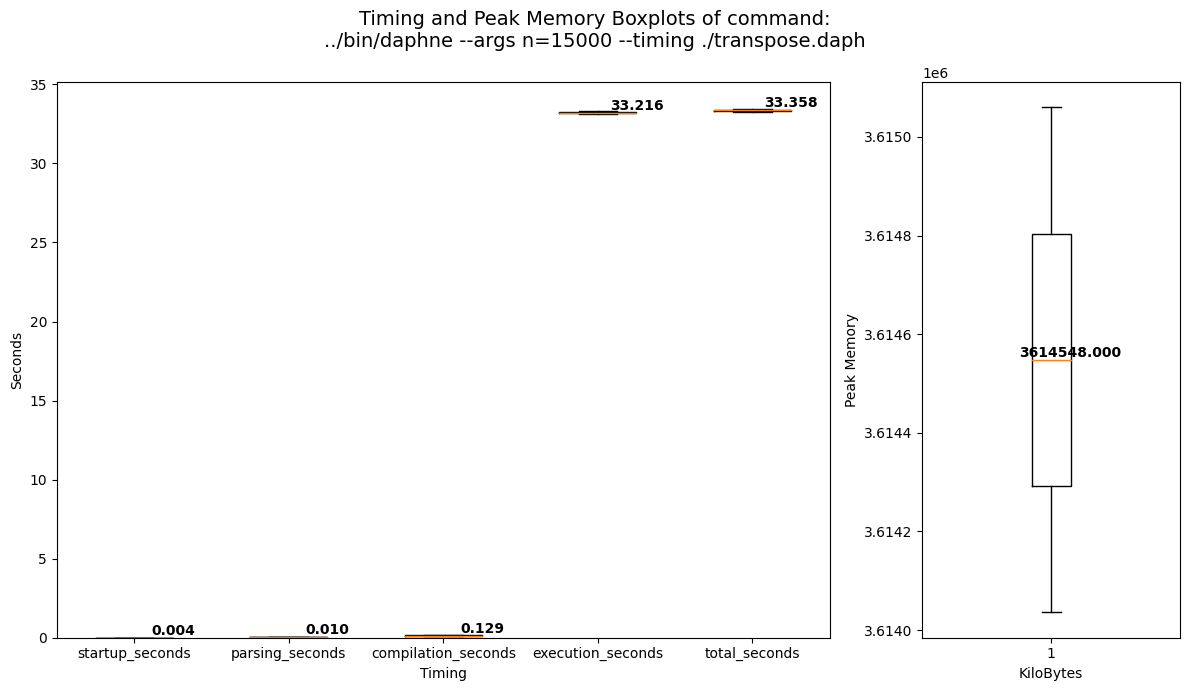

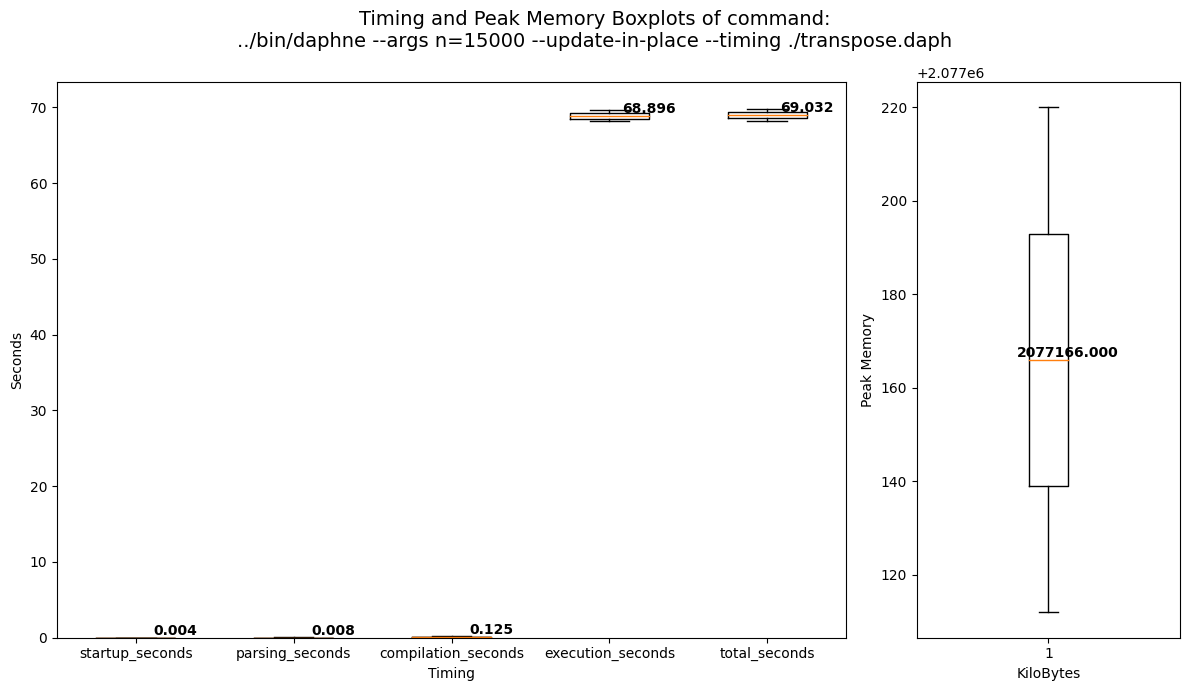

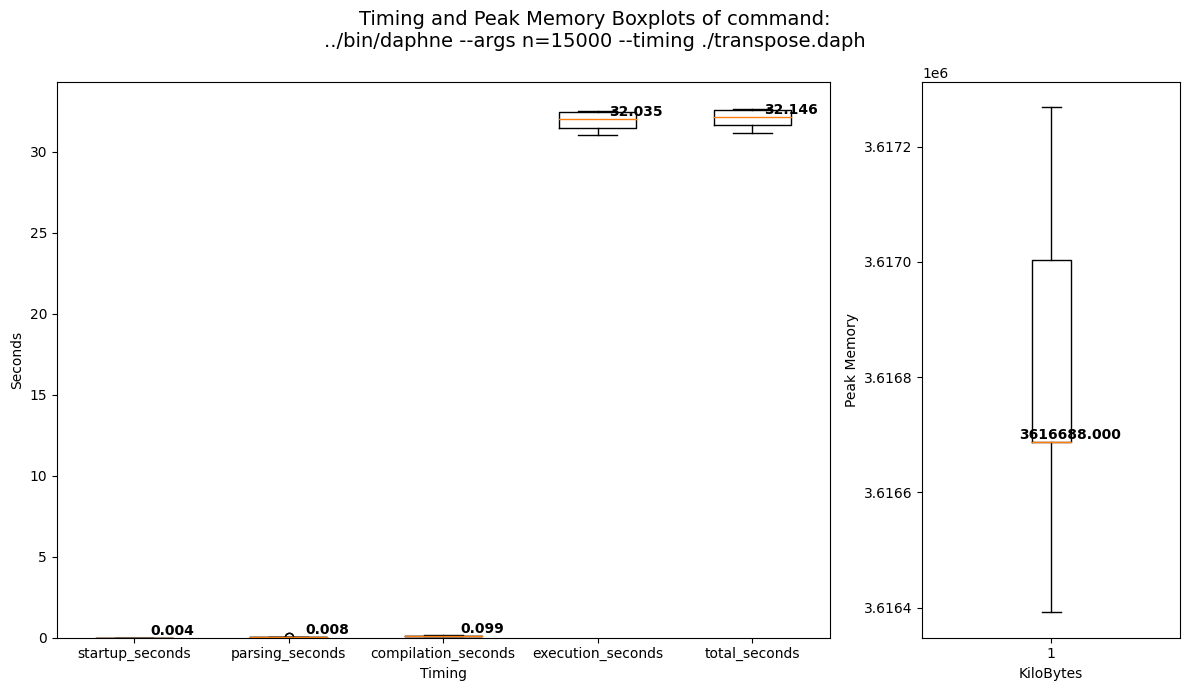

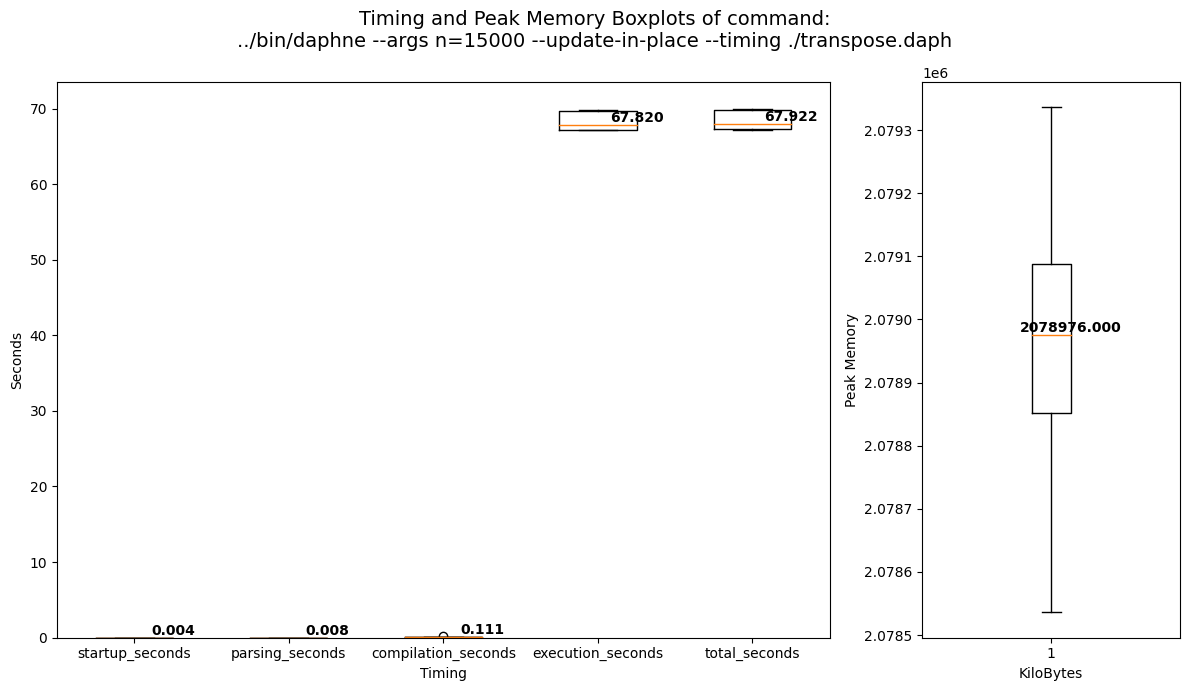

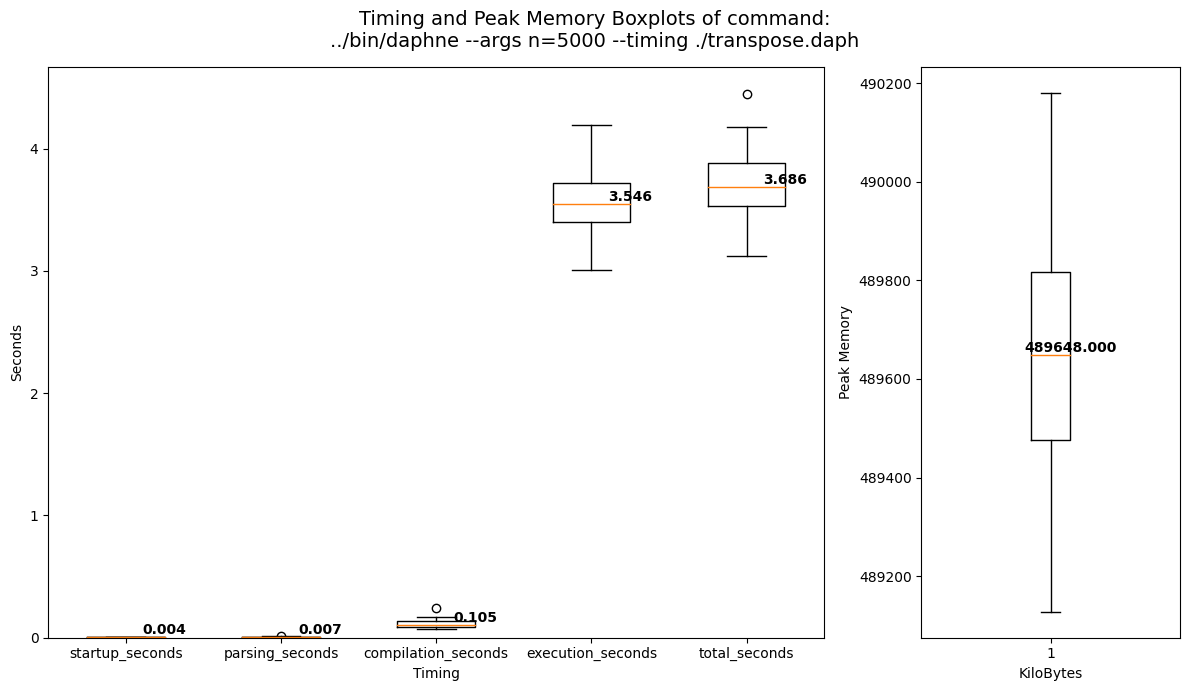

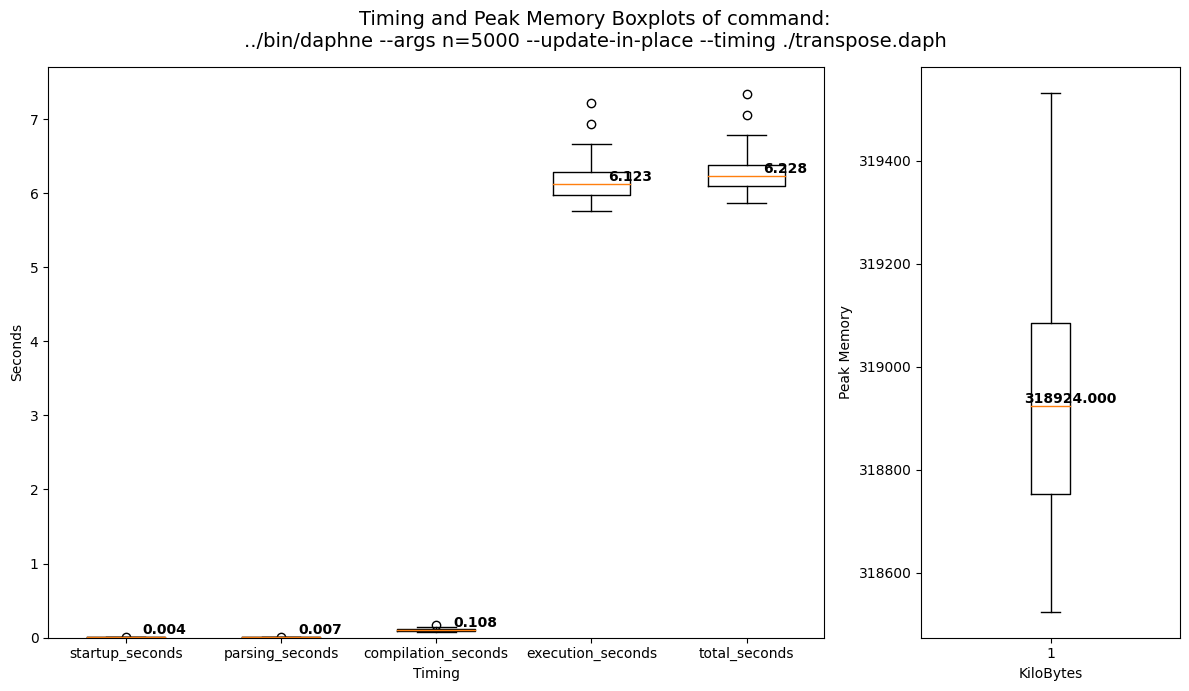

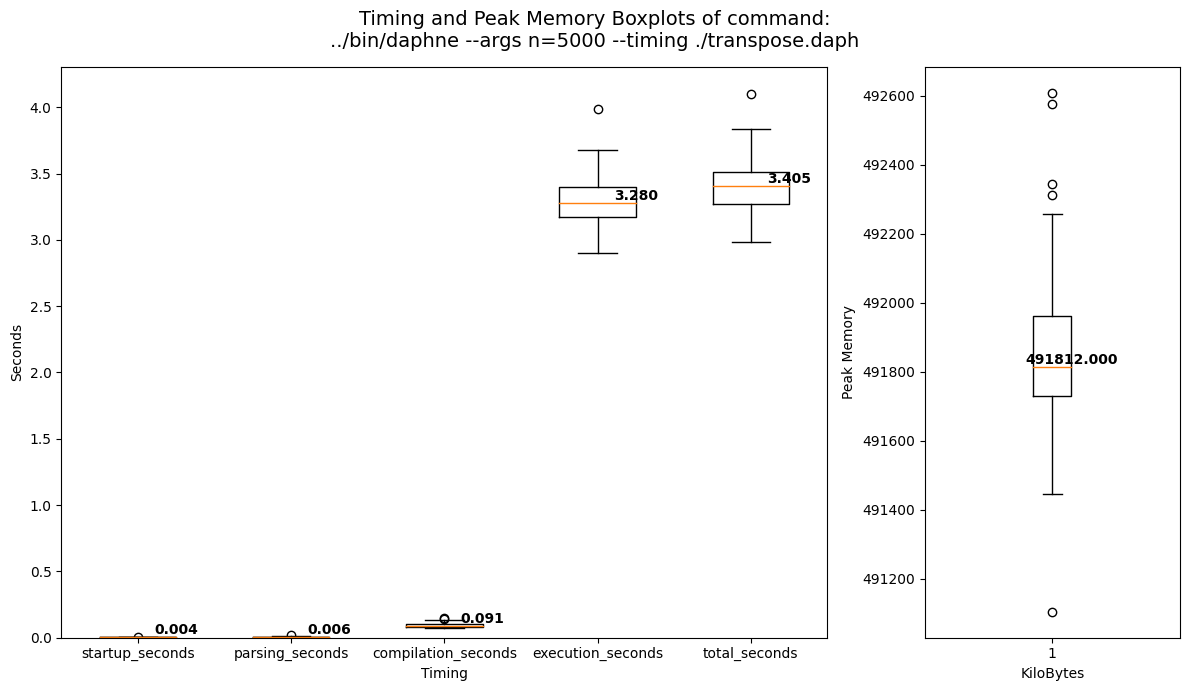

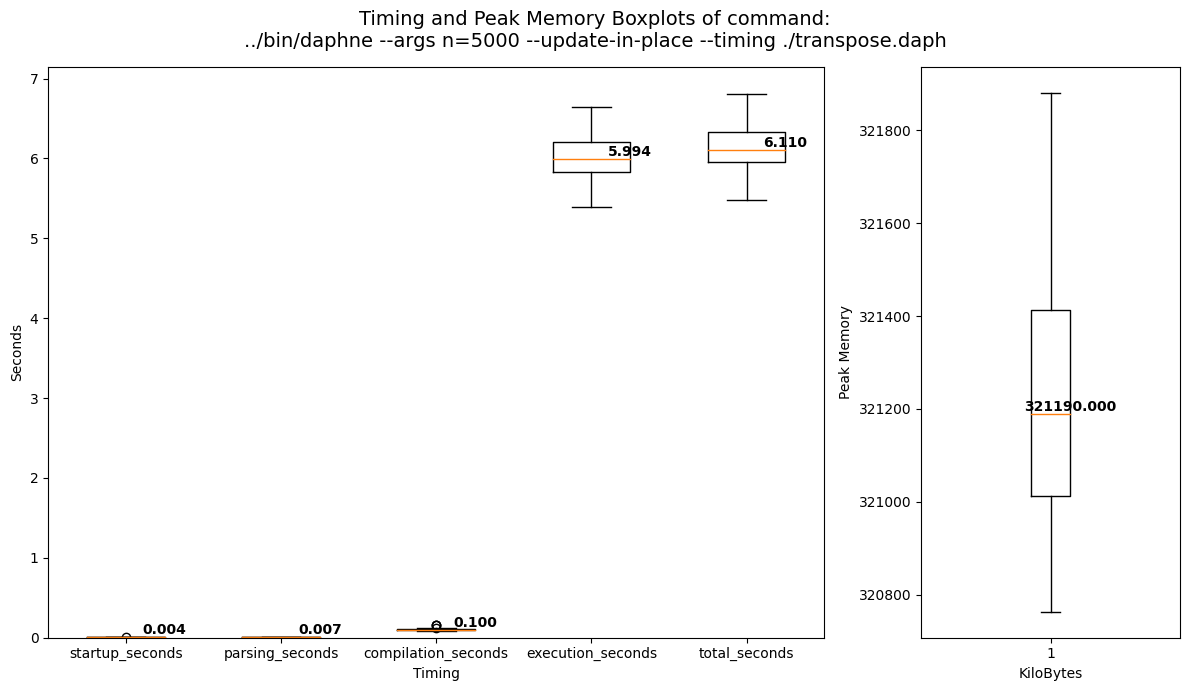

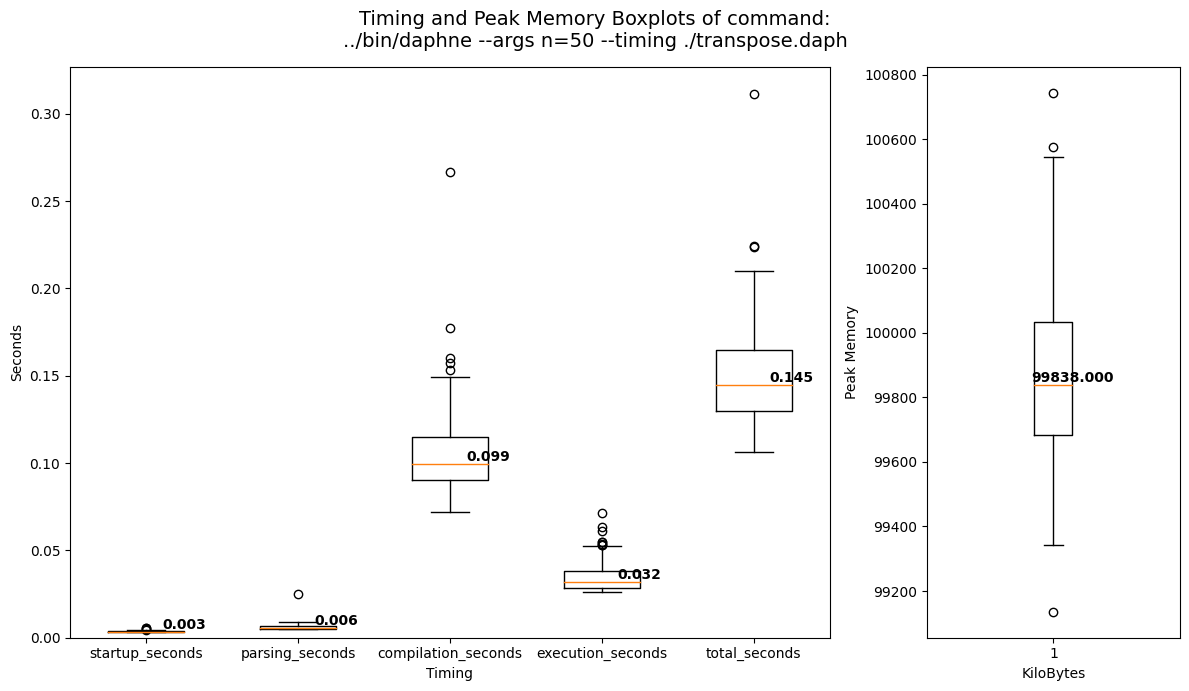

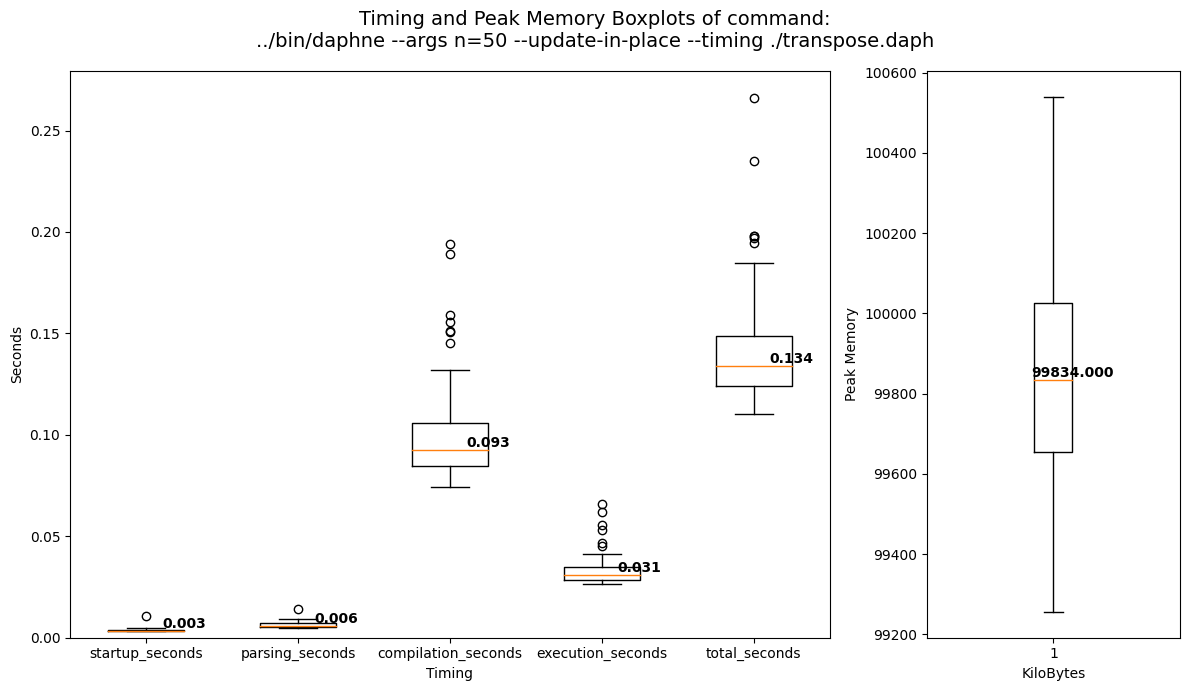

#############################################
########## normalize_matrix ##########
#############################################


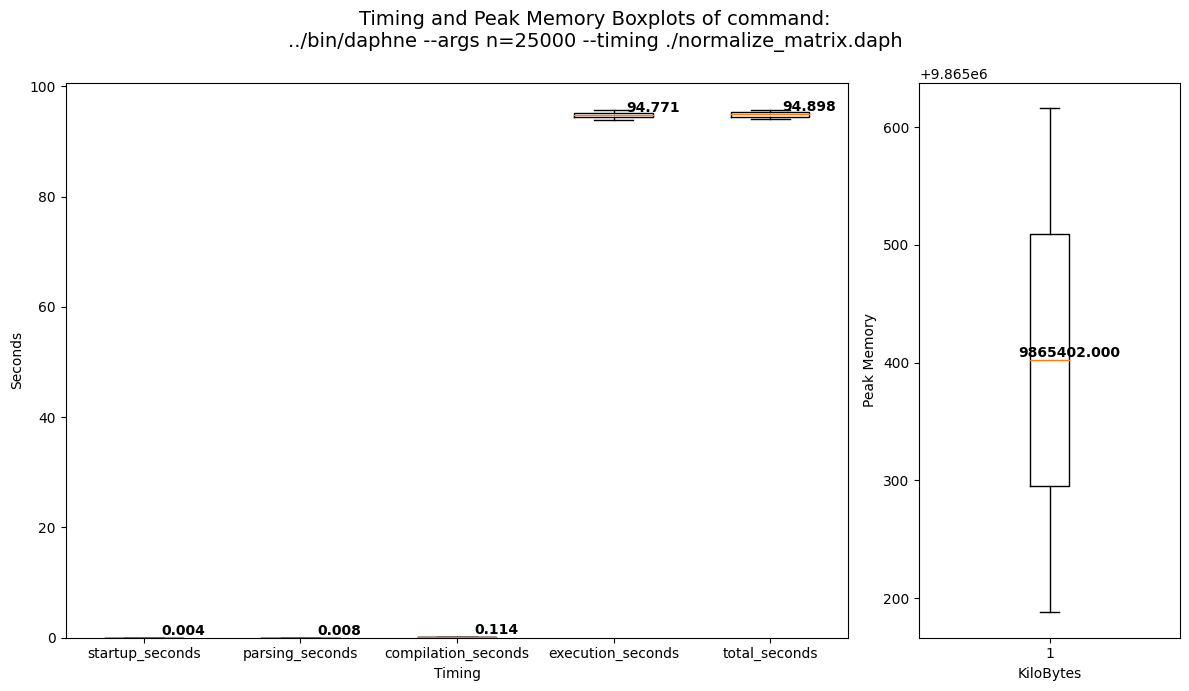

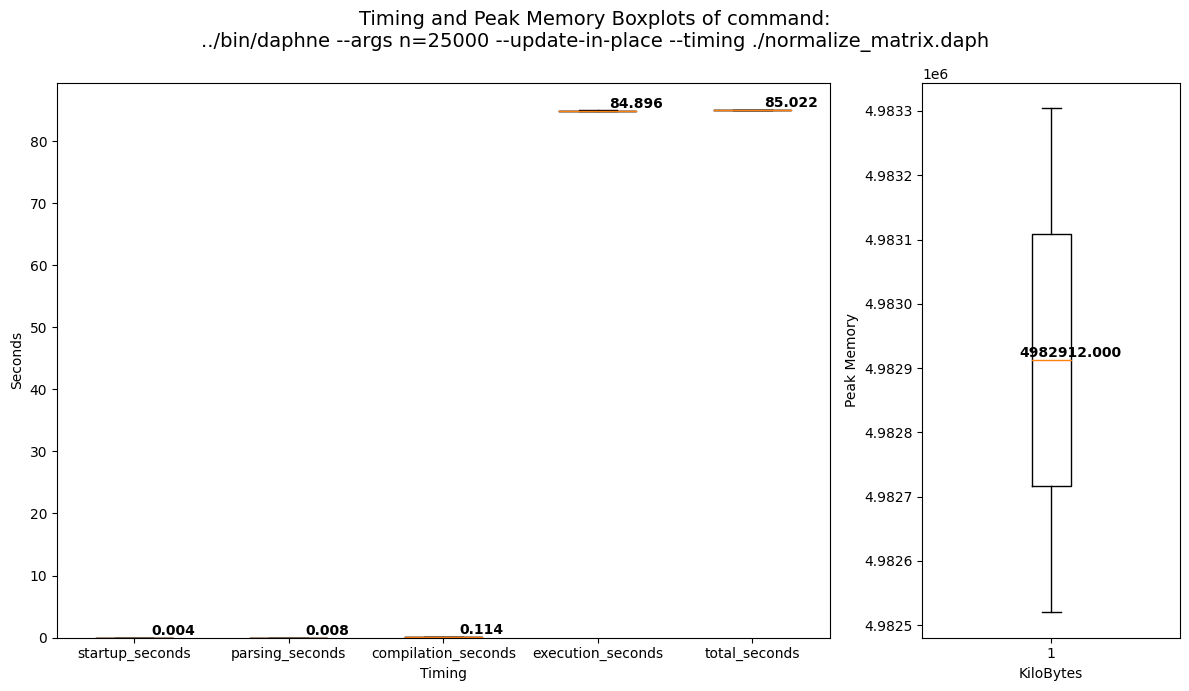

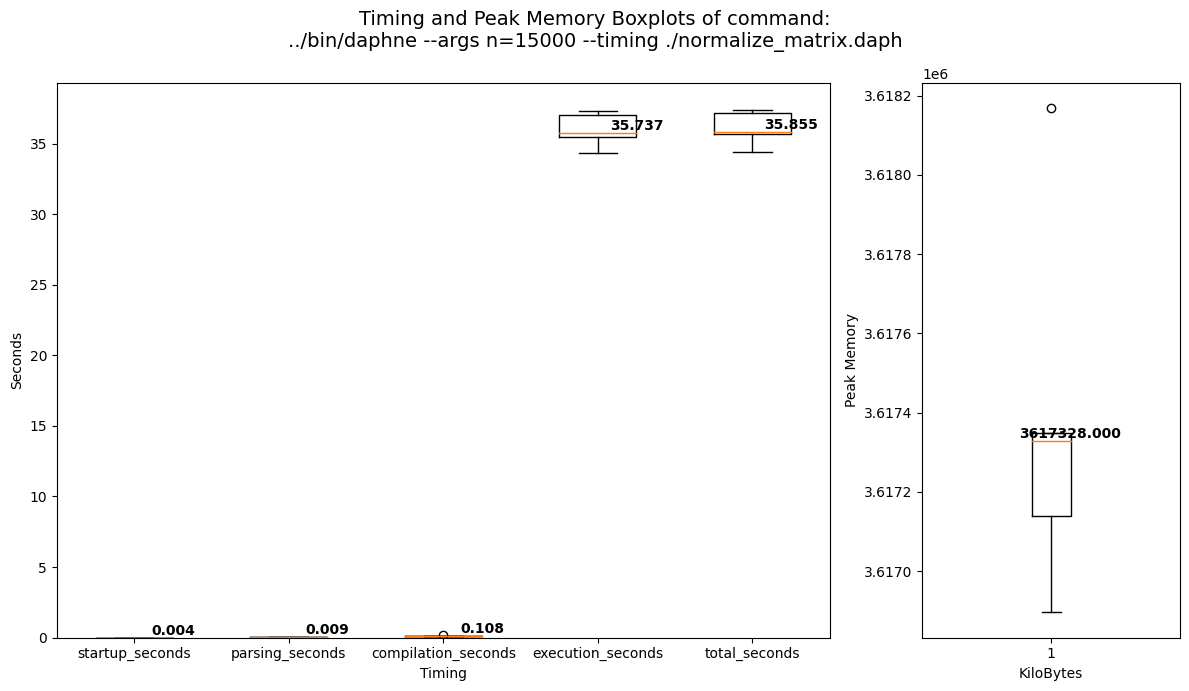

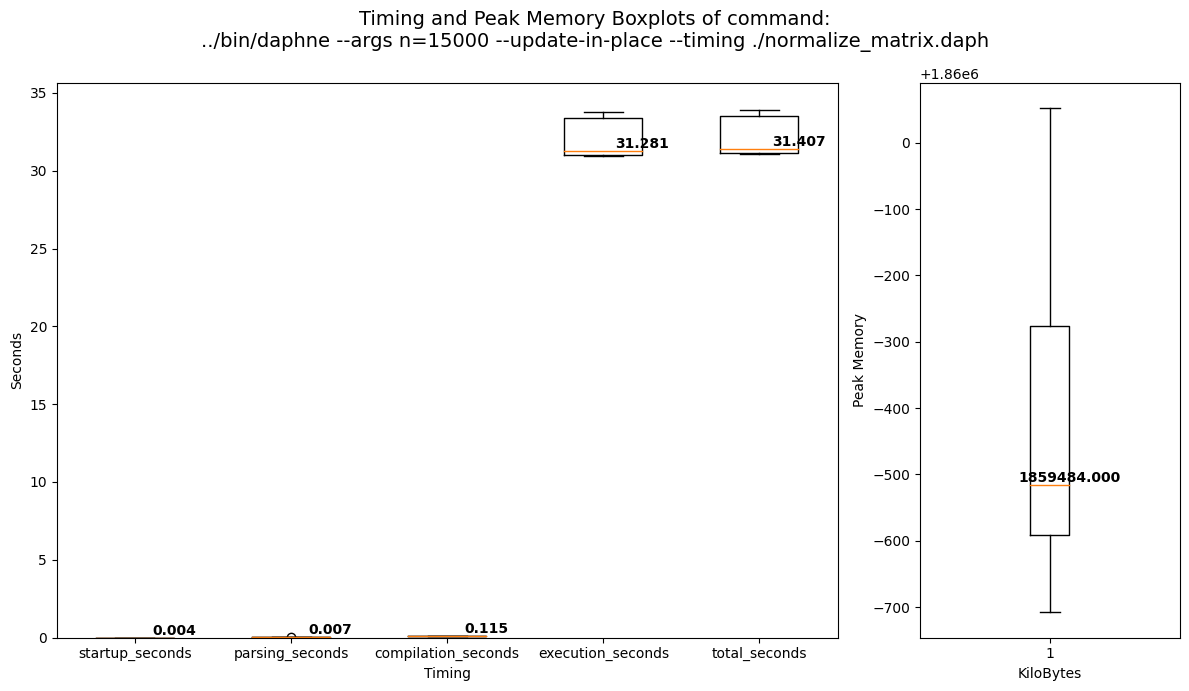

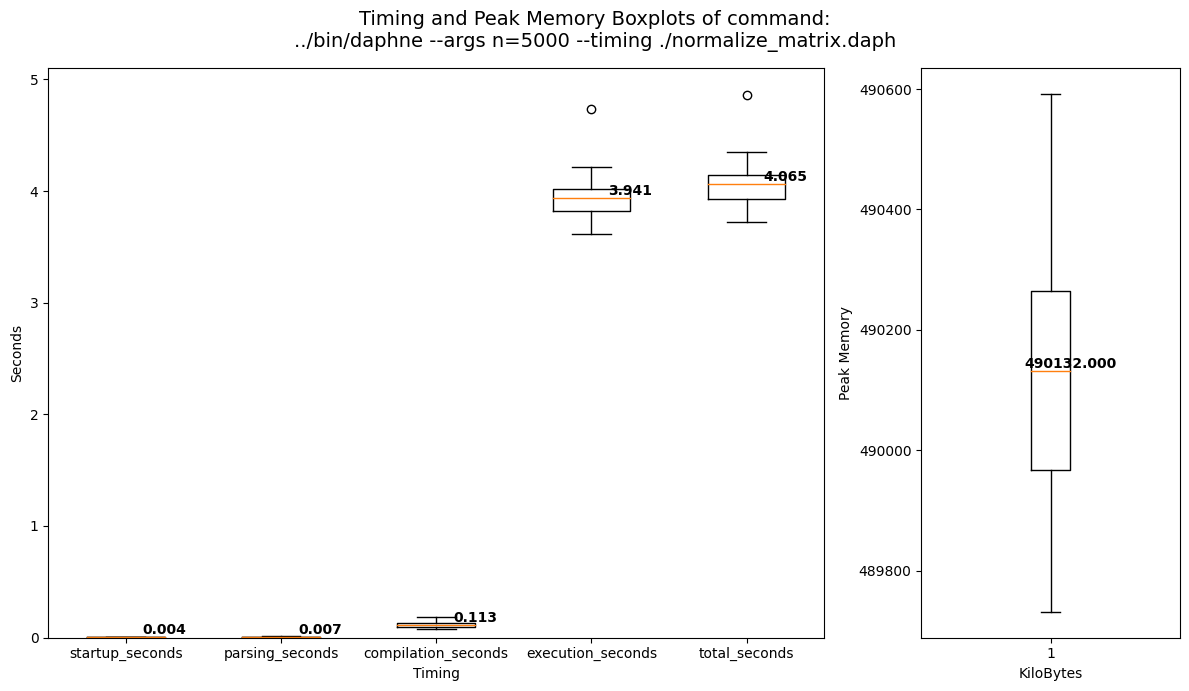

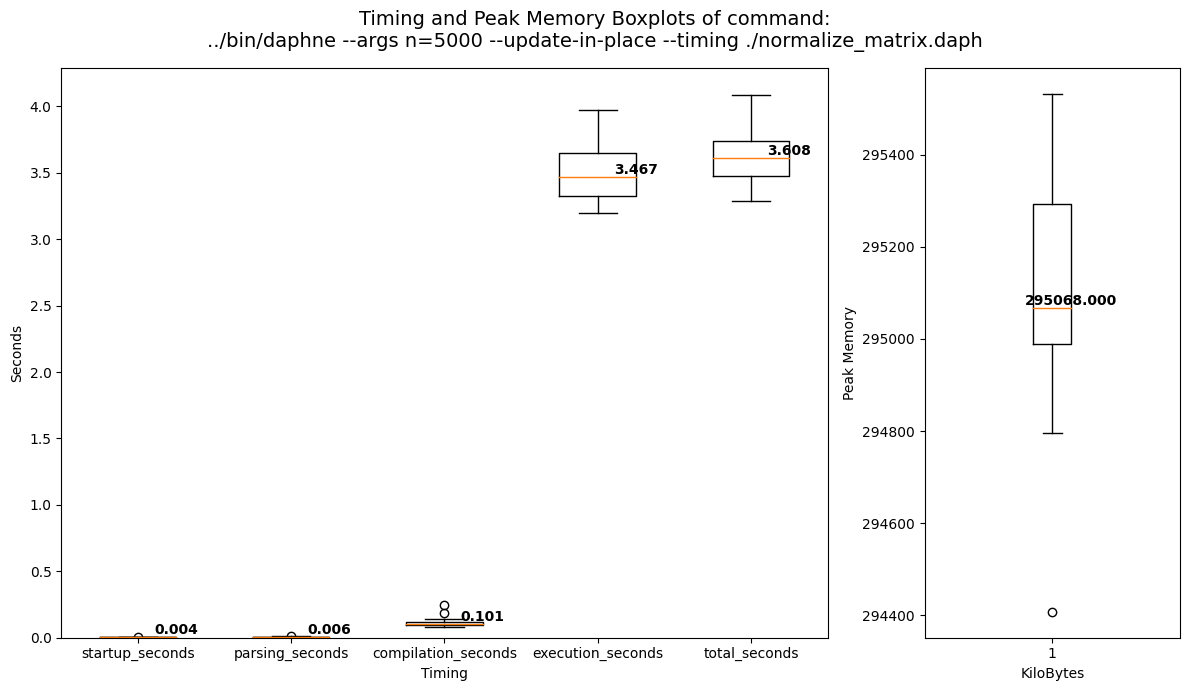

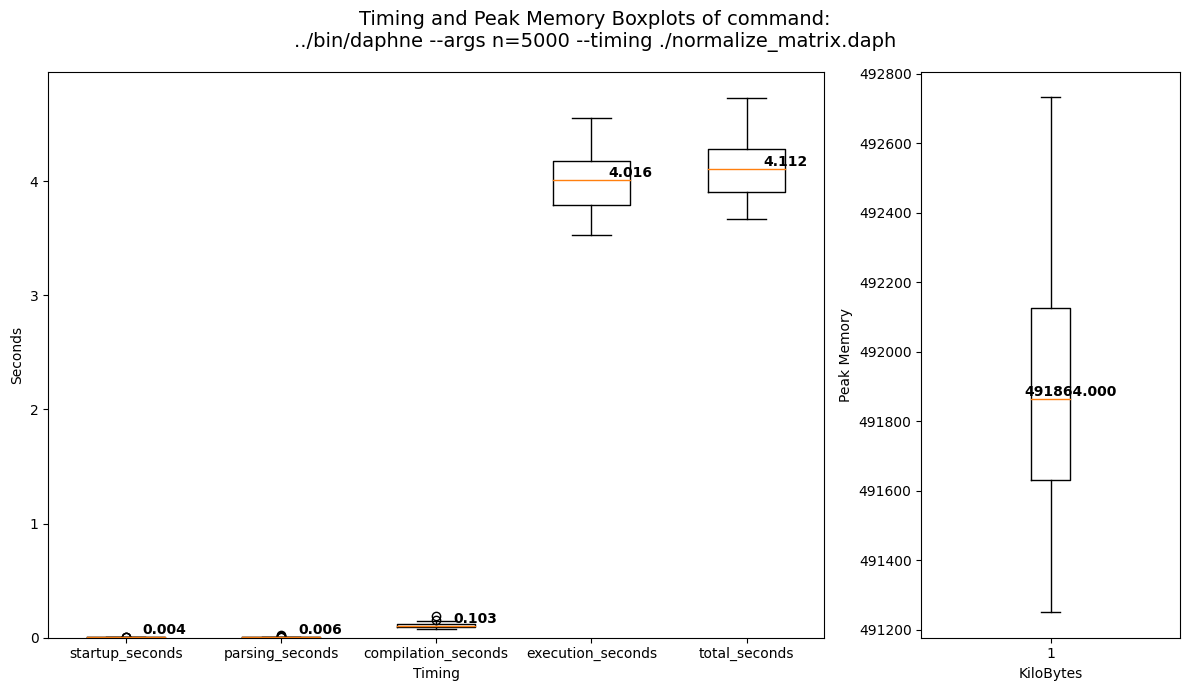

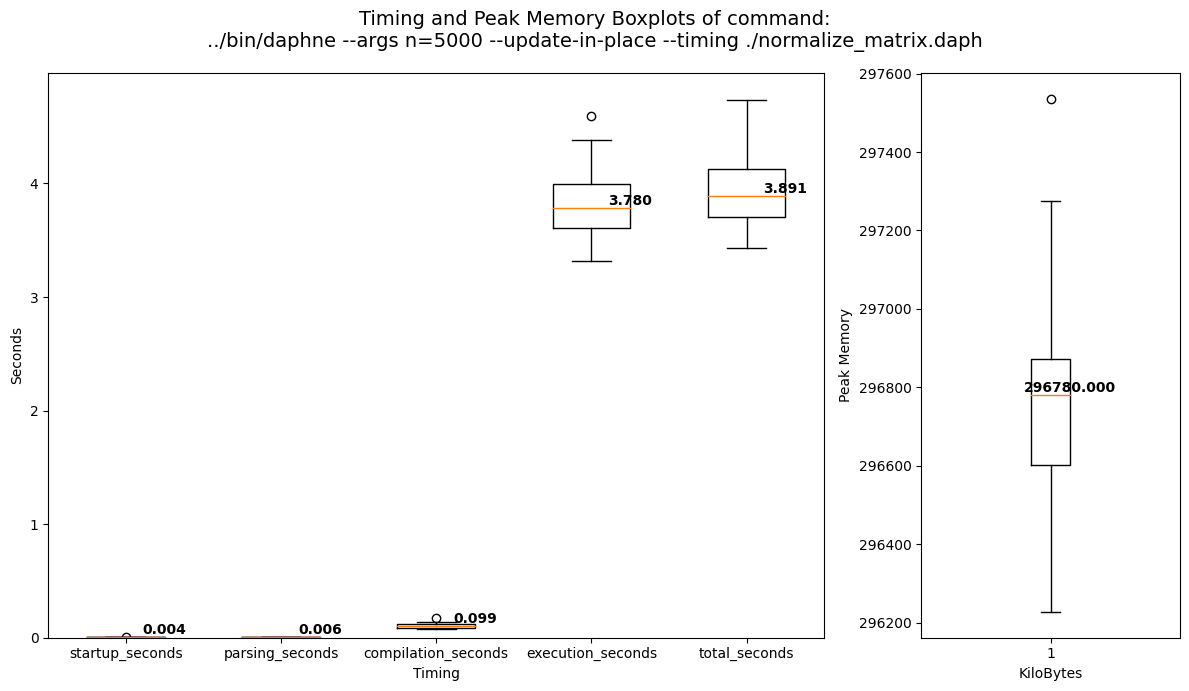

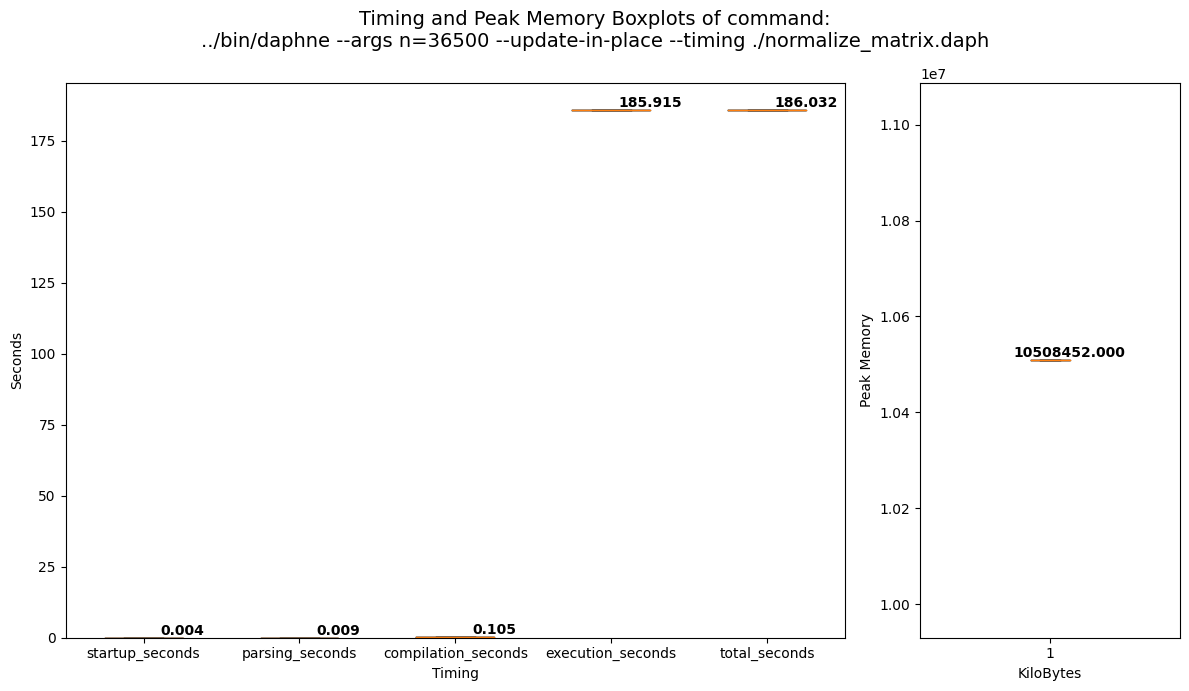

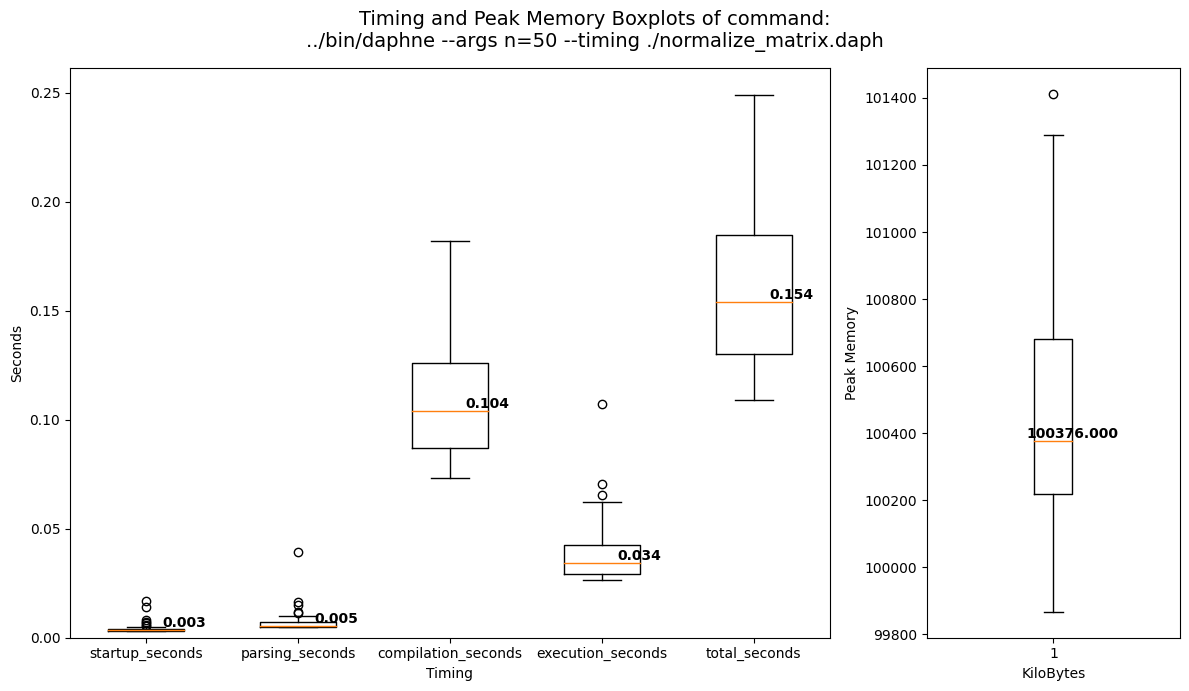

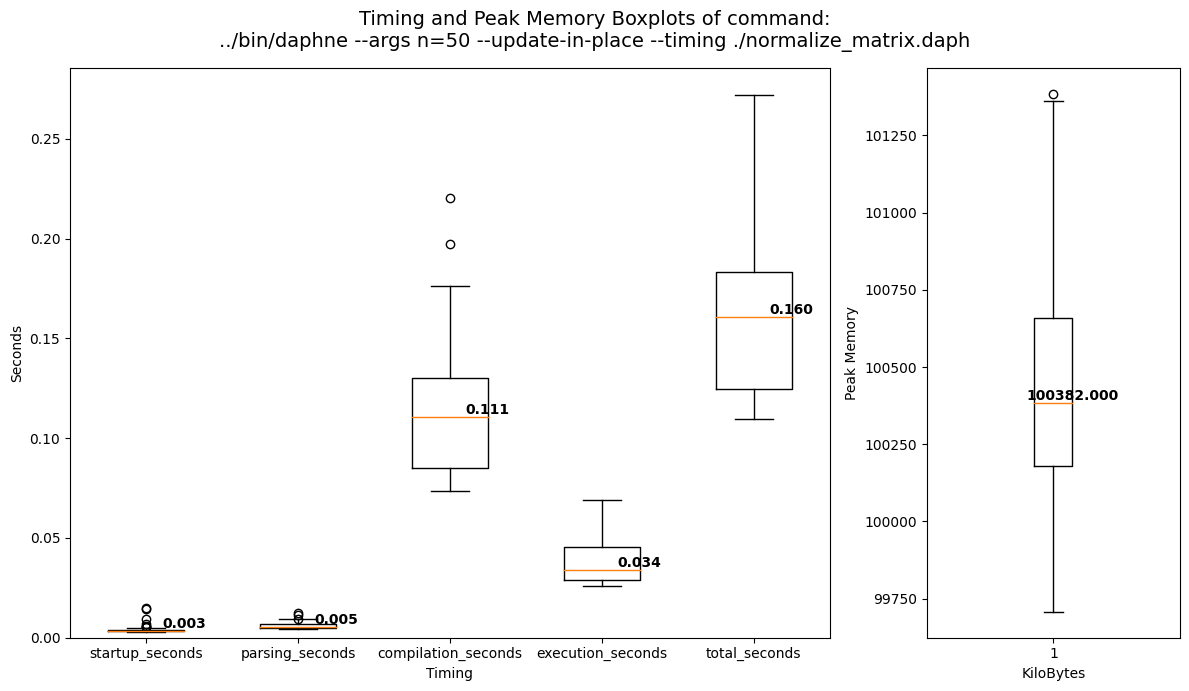

#############################################
########## addition ##########
#############################################


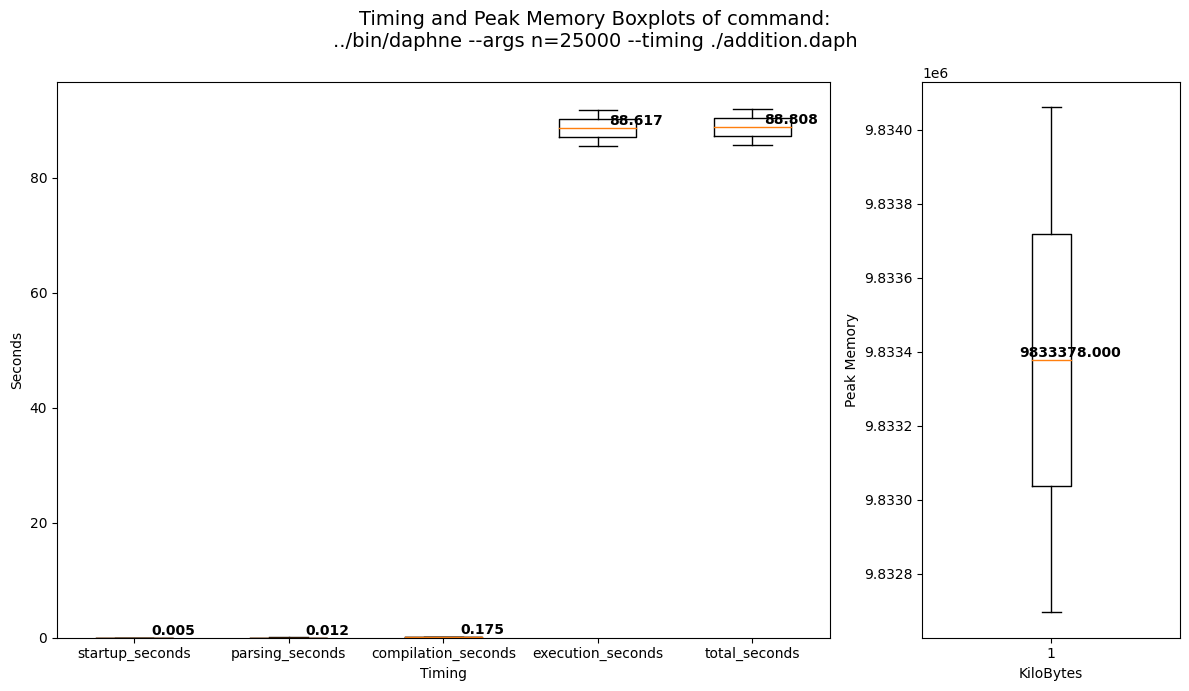

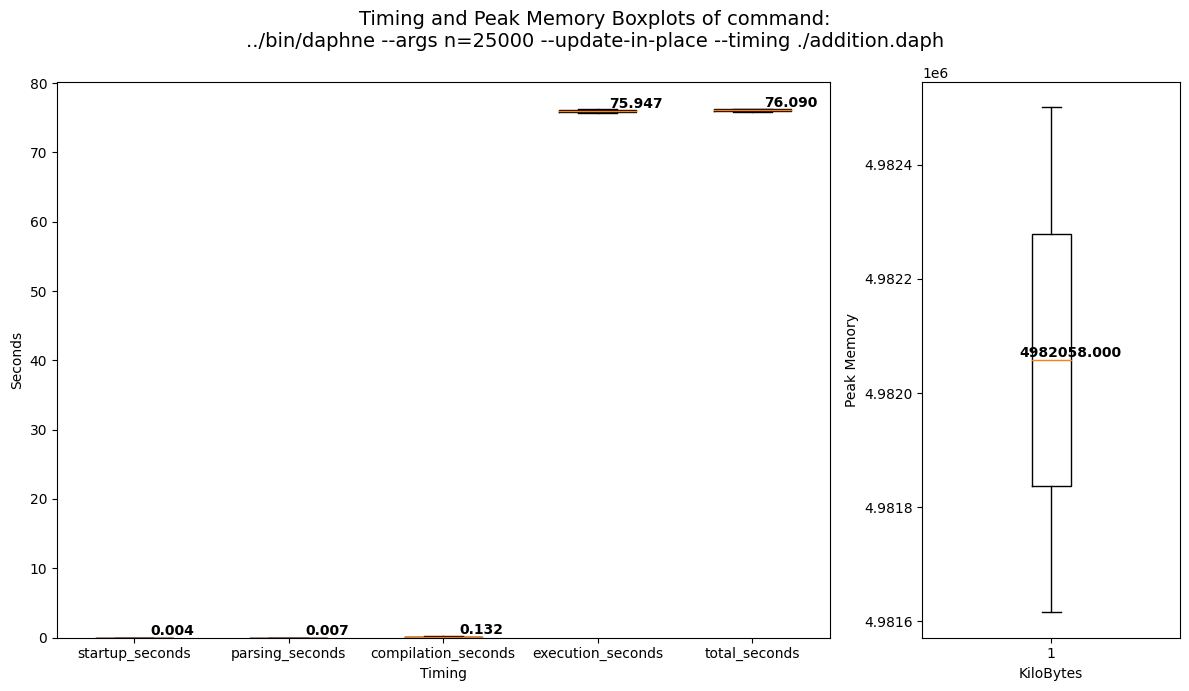

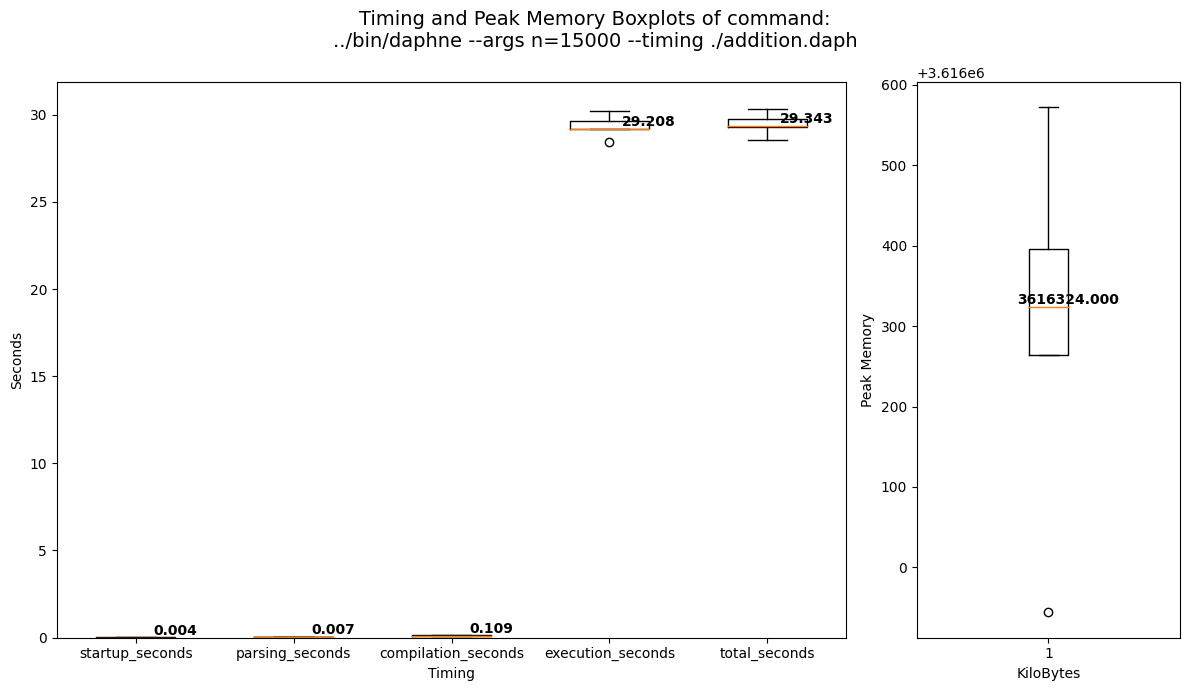

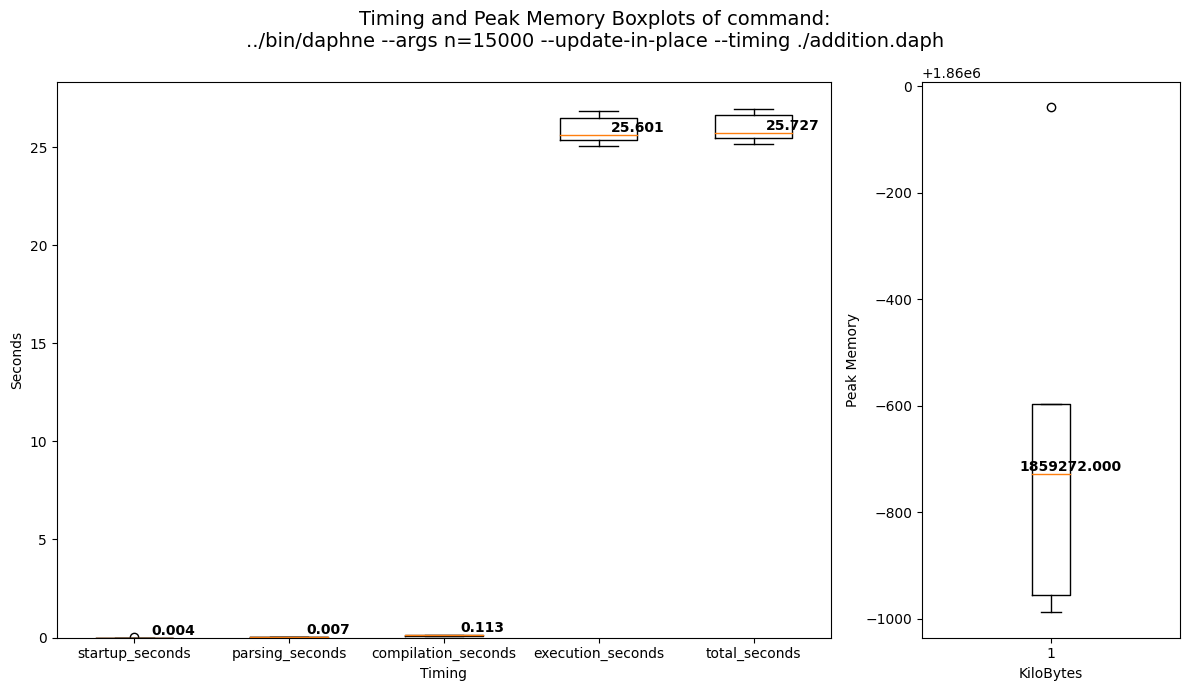

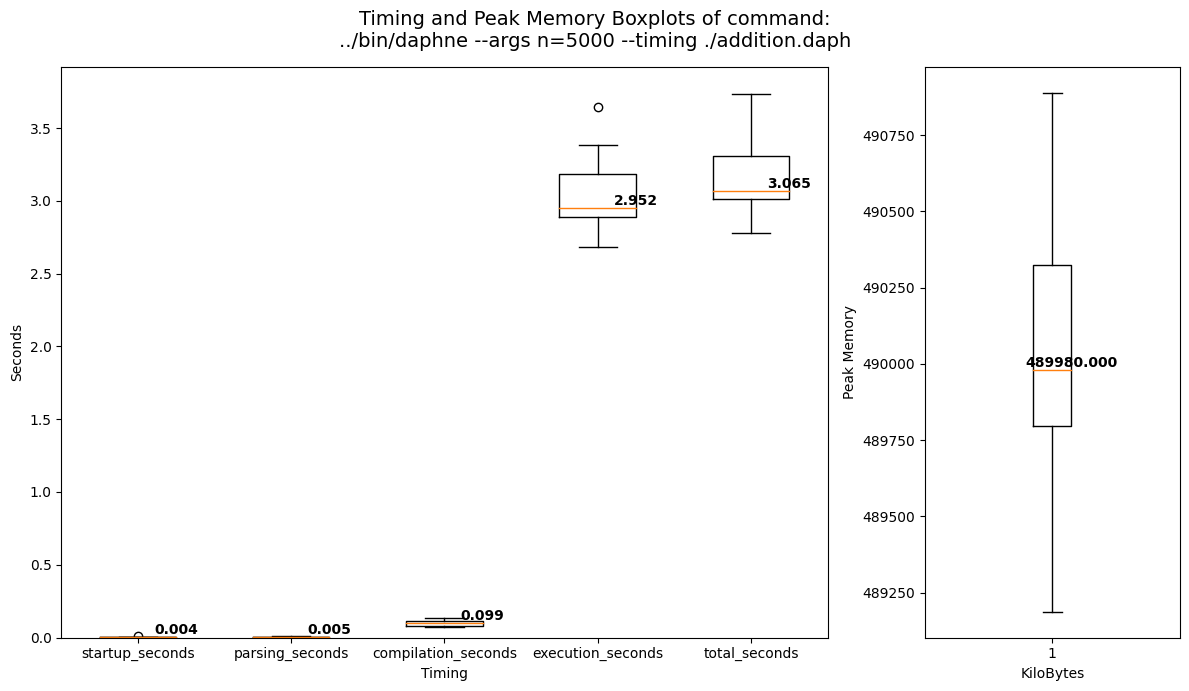

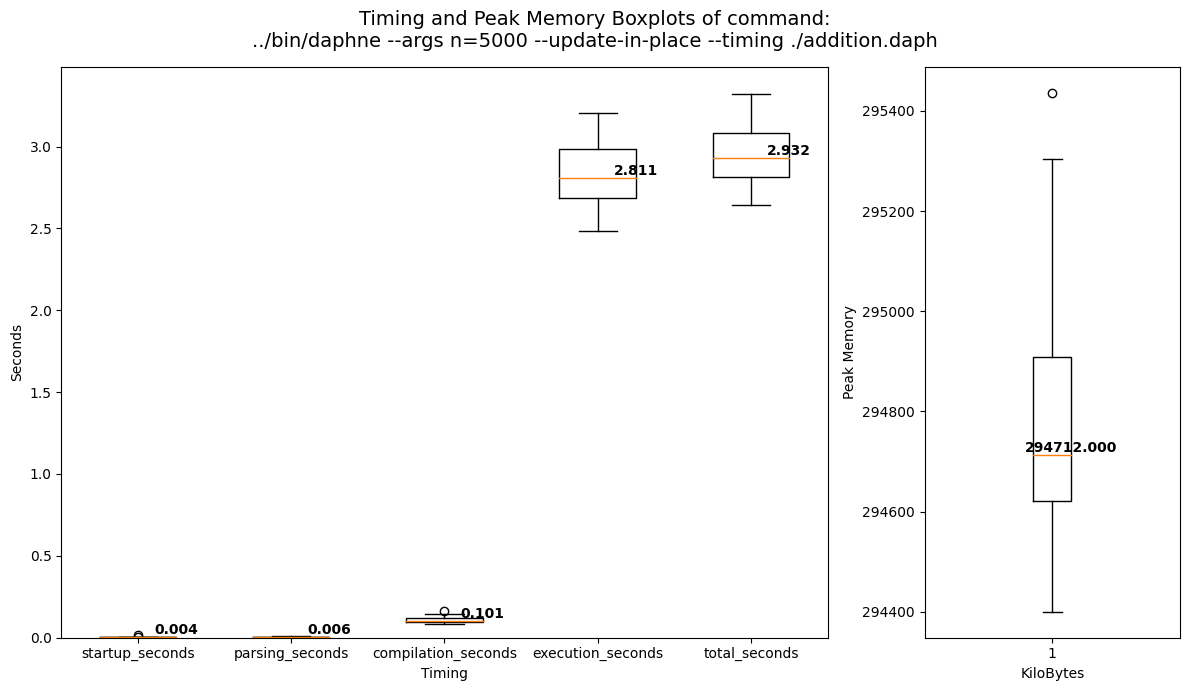

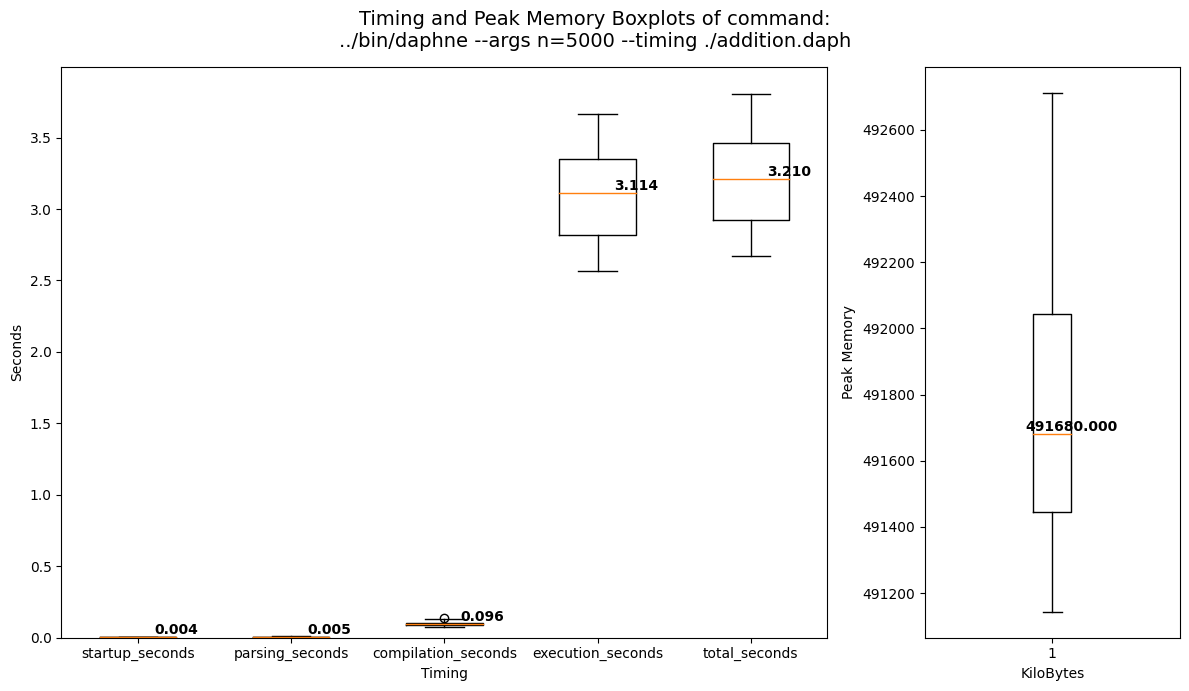

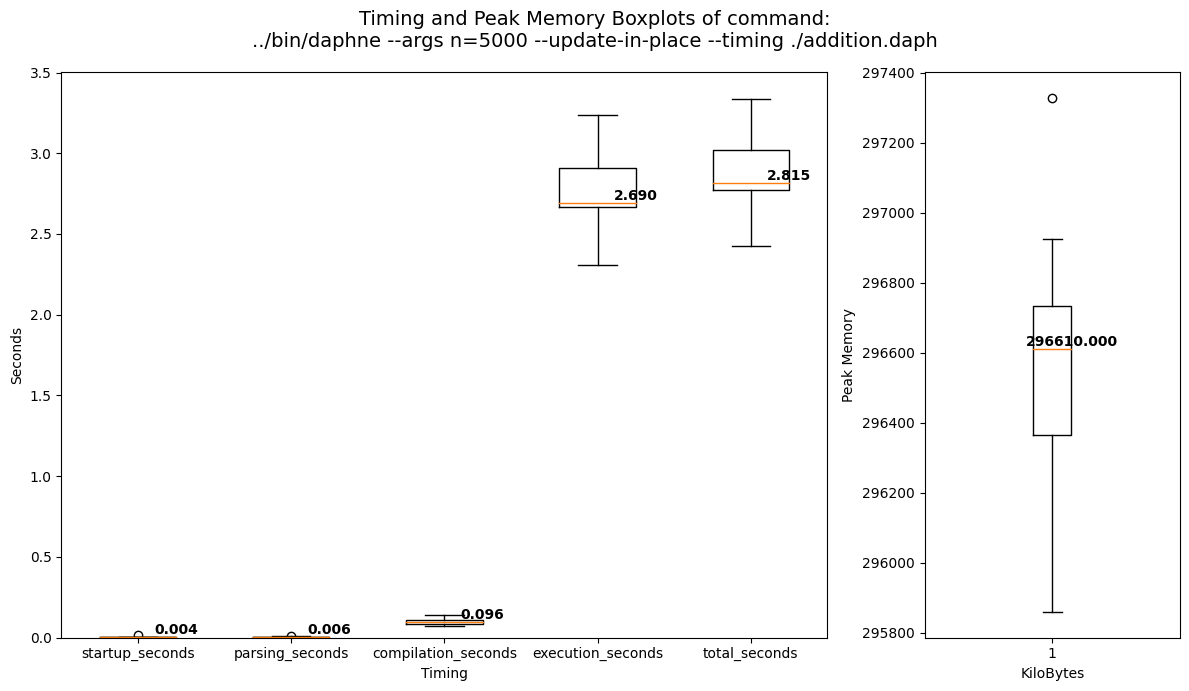

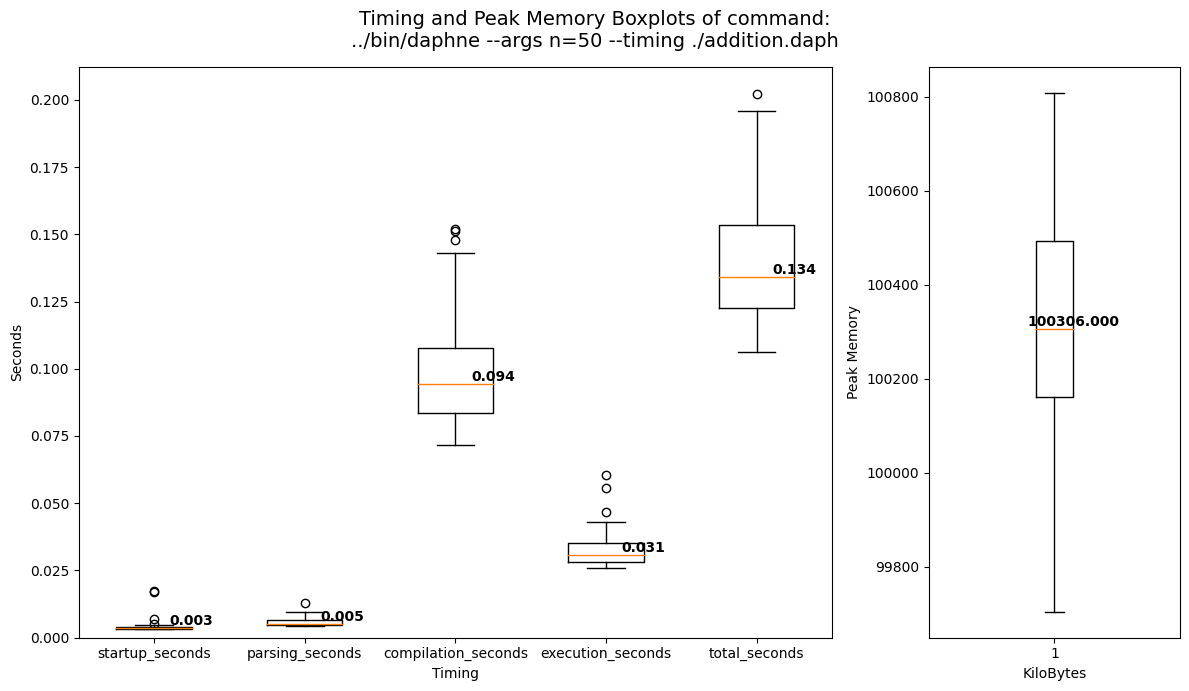

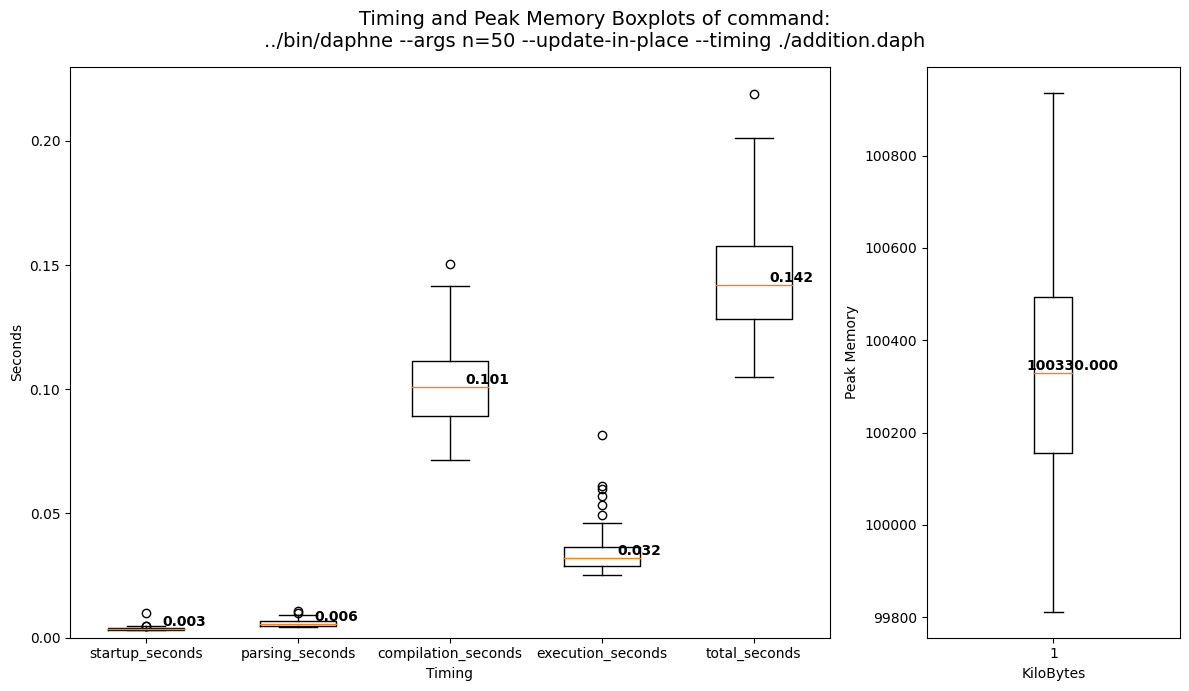

#############################################
########## addition_readMatrix ##########
#############################################


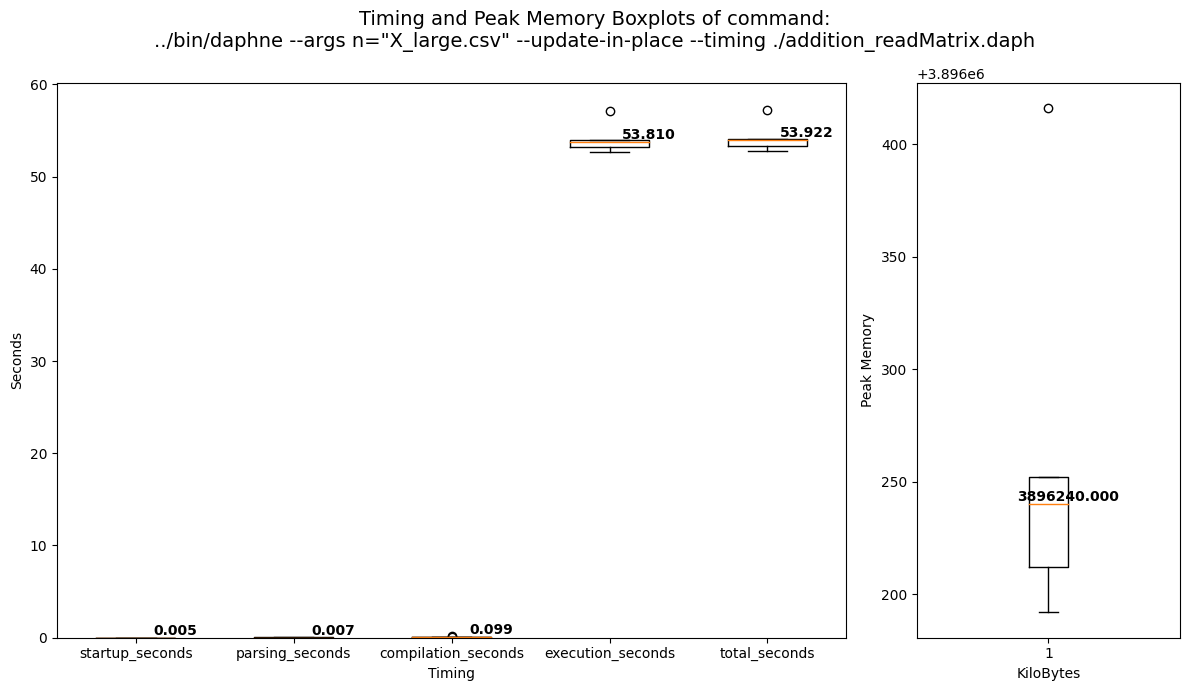

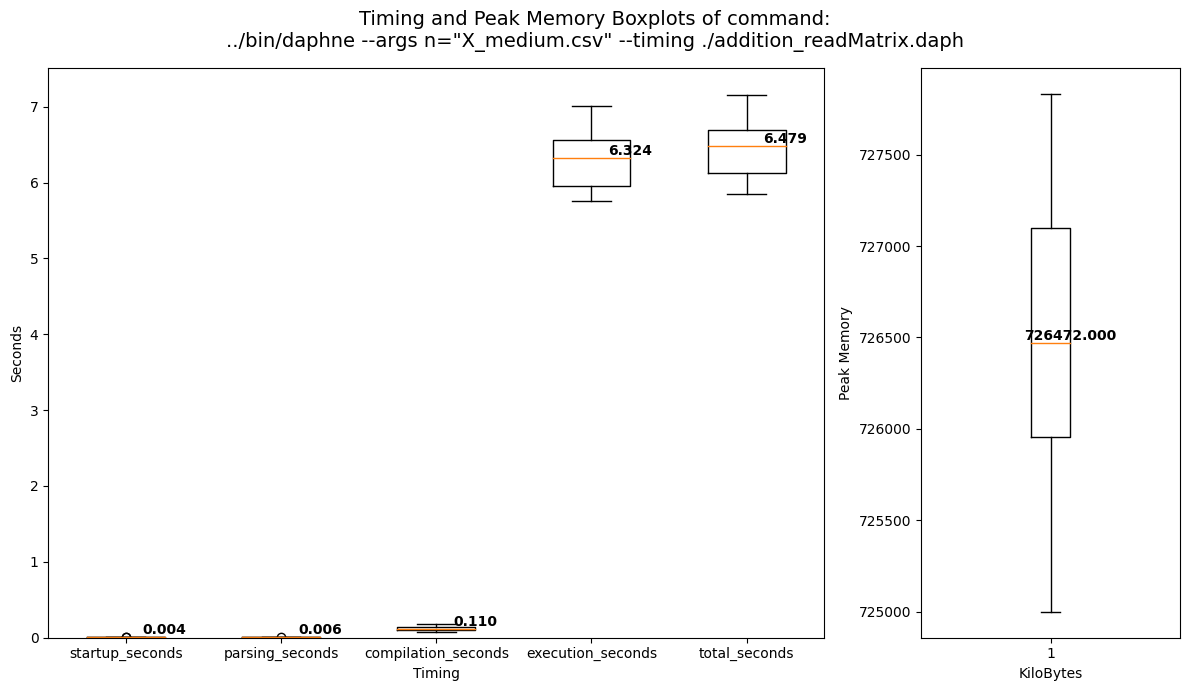

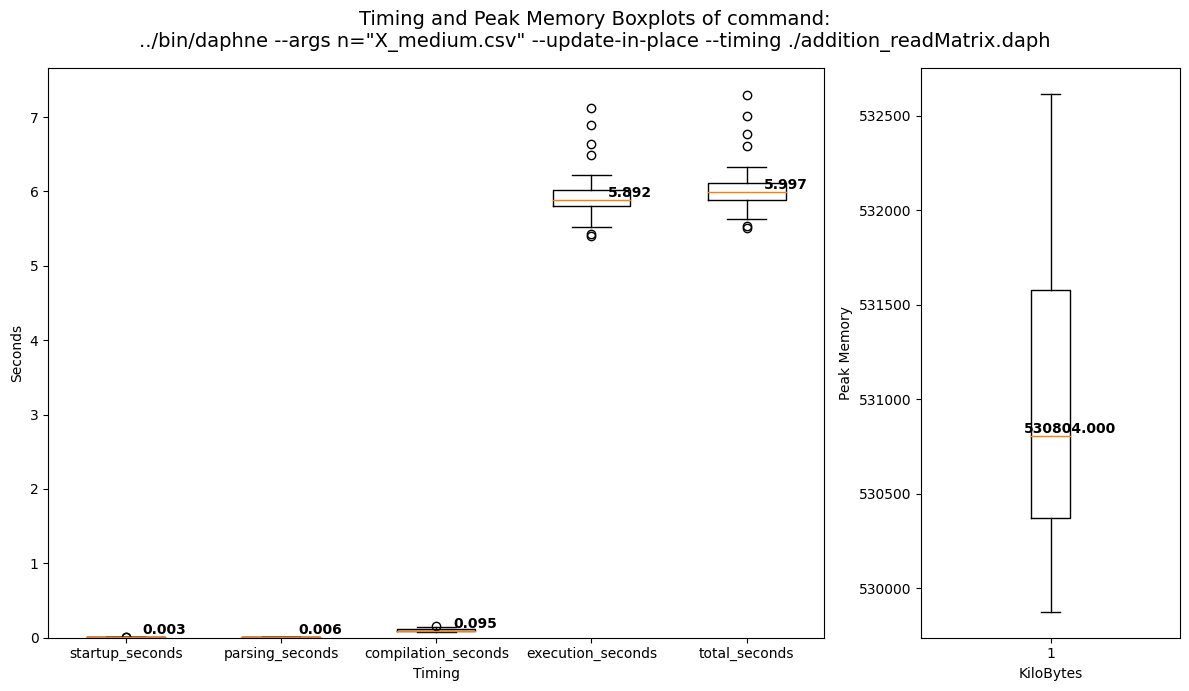

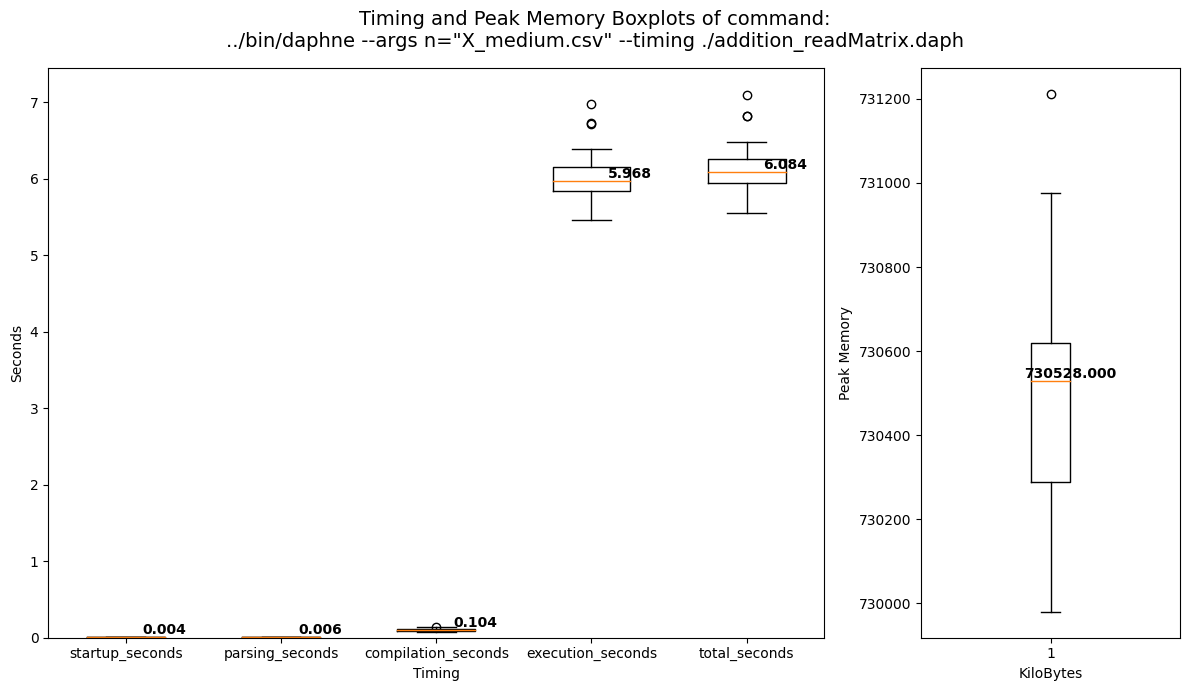

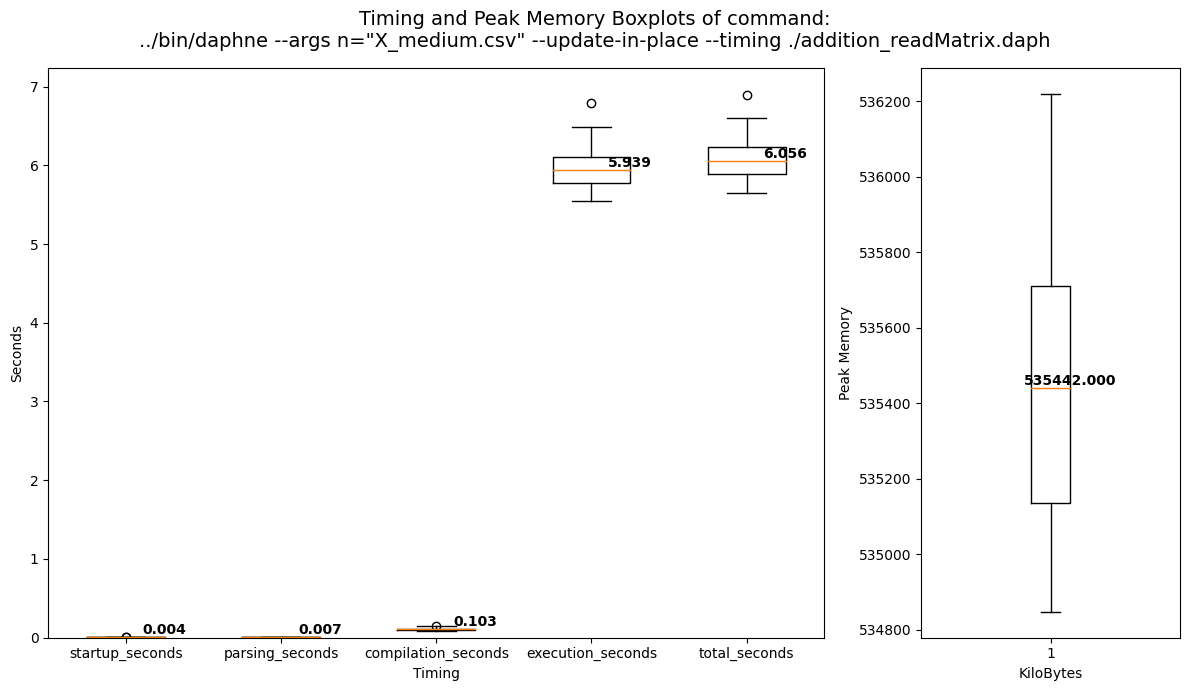

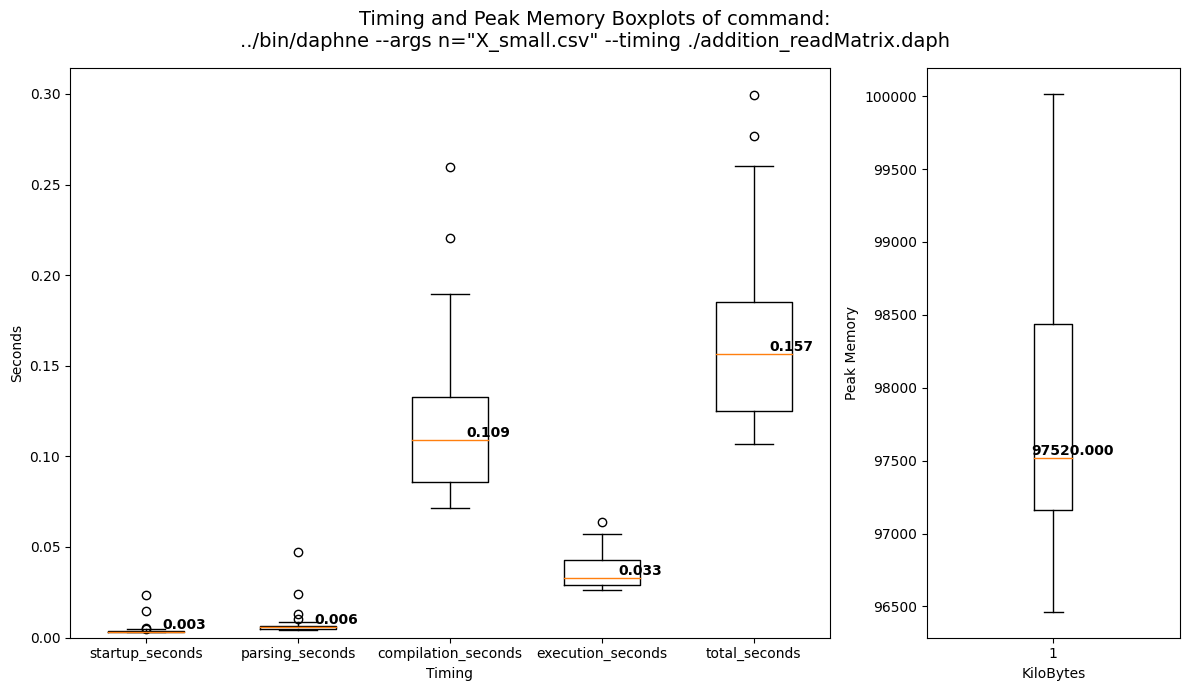

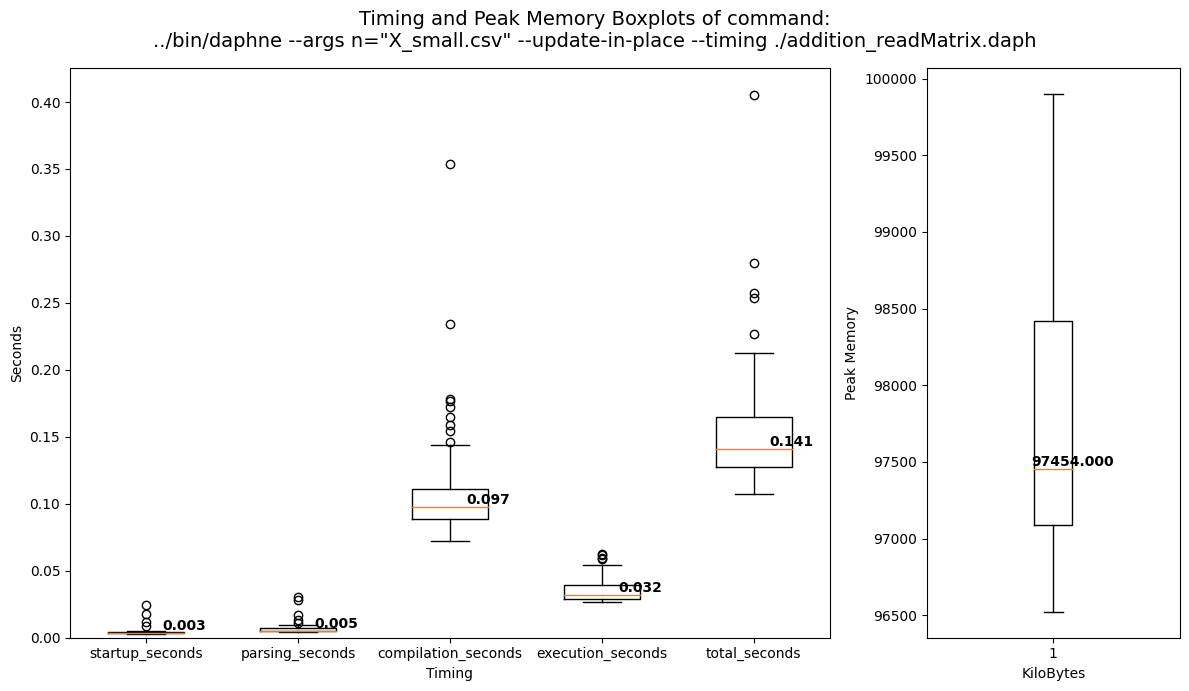

#############################################
########## kmeans ##########
#############################################


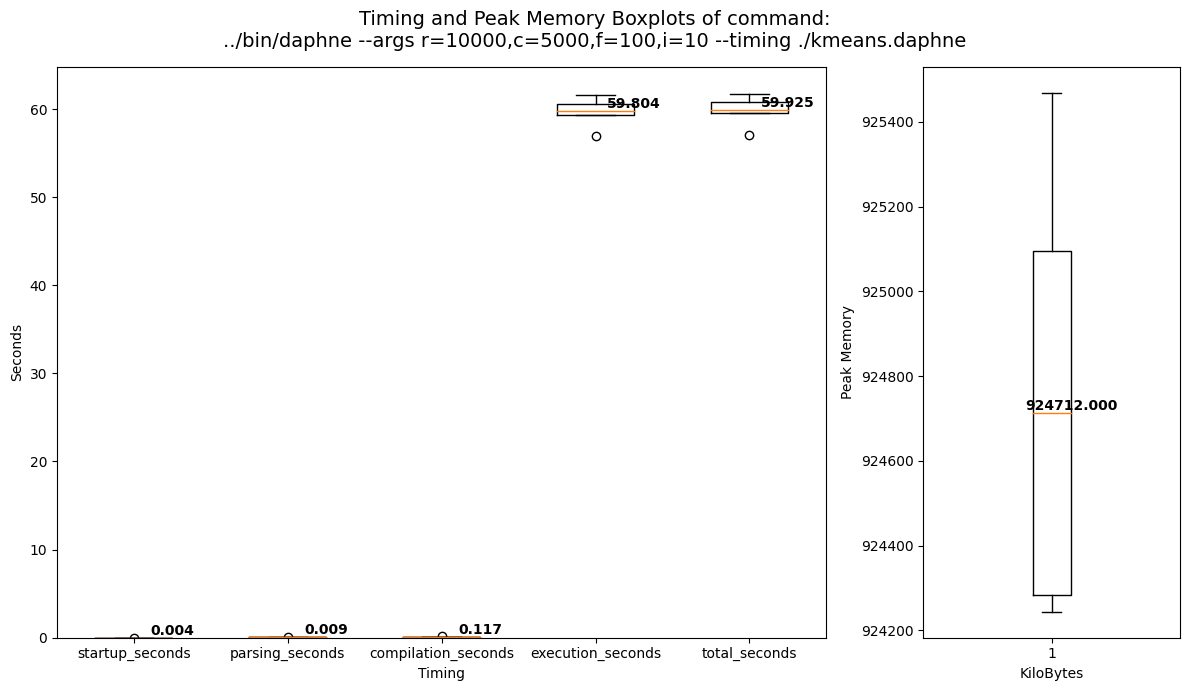

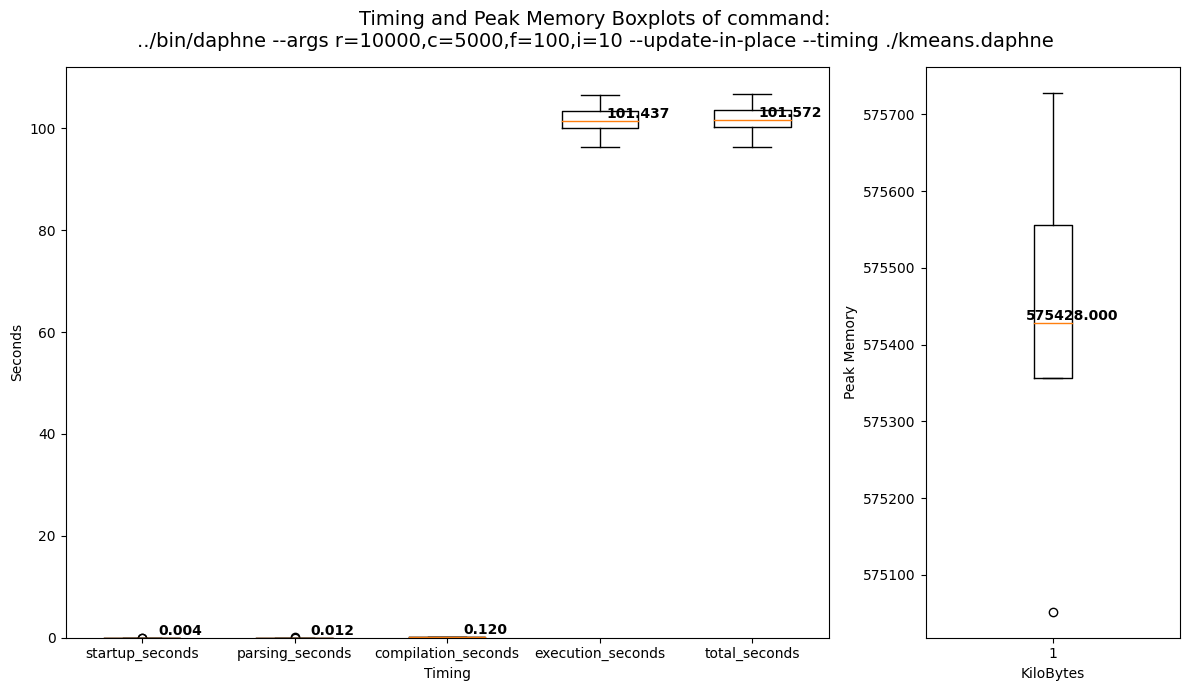

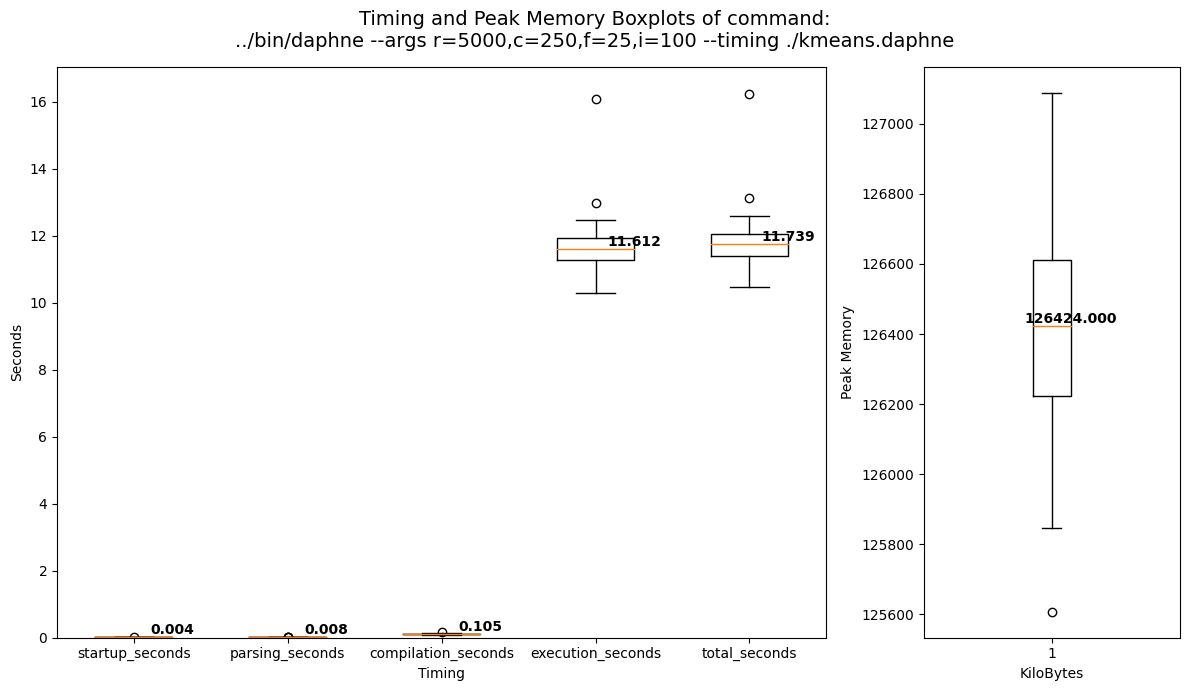

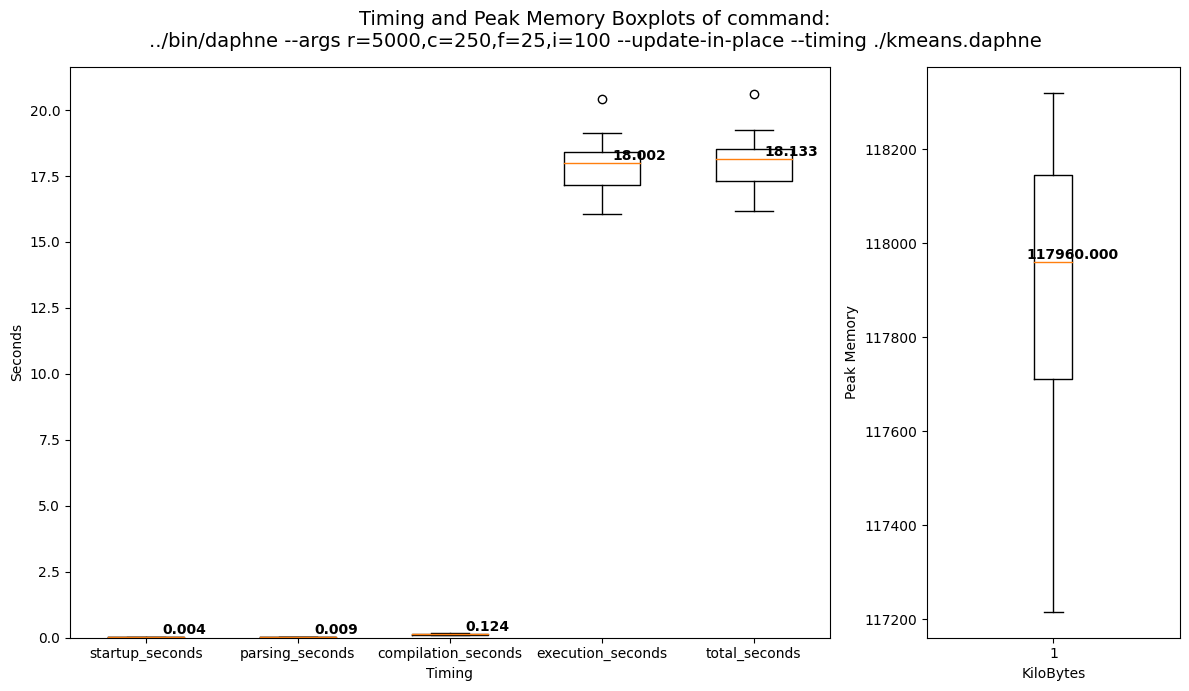

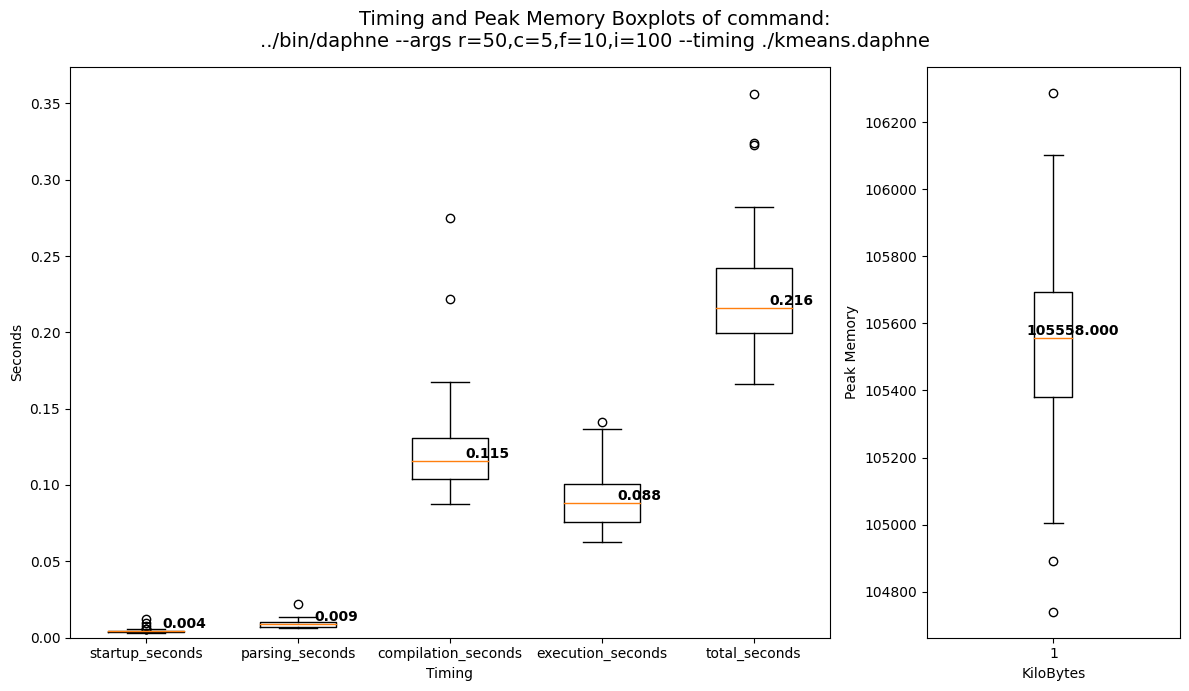

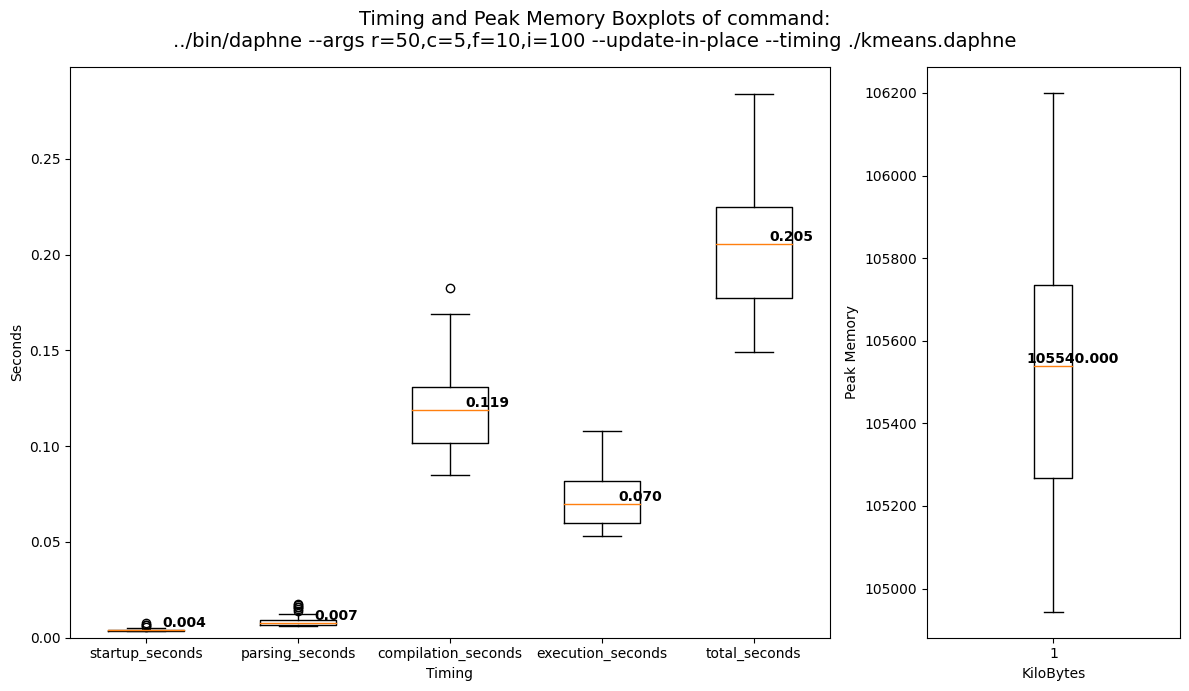

In [8]:
dirs = [d for d in os.listdir(RESULT_PATH) if os.path.isdir(os.path.join(RESULT_PATH, d))]
dirs = [d for d in dirs if not d.startswith('archive')]

for dir in dirs:
    #get all files in directory recursively
    print("#############################################")
    print("########## "+dir+" ##########")
    print("#############################################")
    path = os.path.join(RESULT_PATH, dir)
    files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    files = [f for f in files if f.endswith('.json')]
    files = [os.path.join(path, f) for f in files]
    files.sort()

    for file in files:
        data = open_json(file)
        create_graph(data)